# Вступление

Этот проект показывает: 
- способность писать структурированный код на Python. 
- возможность использования существующих утилит(библиотек) для обработки и анализа данных.
- применение статистического анализа
- применение исследовательского анализа
- навыки анализа и предварительной обработки данных

Проект является сборным проектом, который включает в себя:
1. Предварительная обработка данных
2. Исследовательский анализ
3. Статистический анализ

Сборный проект из учебного курса "[Специалист по Data Science](https://praktikum.yandex.ru/data-scientist)" от [Яндекс Практикум](https://practicum.yandex.ru/).

Библиотеки, которые использовались в проекте:

 |Library           |Version            |
 |:---------------|:------------------------|
|Pandas      | 0.25.1                |
|Numpy        |1.18.3              |
|matplotlib        |3.1.0                |
|seaborn       |0.11.0              |
|scipy         |1.4.1 |

# Подготовка проекта

In [1]:
%%html
<style>
table {float:left}
</style>

## Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import warnings
# Для чтения файла
import os 
from pathlib import Path
import urllib
# Для визуализации графиков
import matplotlib.pyplot as plt
import seaborn as sns
# Для проверки гипотез
from scipy import stats as st

## Настройка matplotlib

In [3]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [4]:
# повышение четкости на больших экранах
%config InlineBackend.figure_format = 'retina'

In [5]:
# отключим всякие предупреждения Anaconda
warnings.filterwarnings('ignore')

In [6]:
# уберём экспоненциальную запись
pd.options.display.float_format = '{:.3f}'.format

In [7]:
# вывод всех столбцов
pd.set_option('display.max_columns', None)

# Сборный проект

# Проект "Выявление закономерностей определяющие успешность игры"

## Описание проекта
В нашем распоряжении данные с открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо помочь глобальному интернет-магазину "Стримчик" найти потенциально популярный продукт, что позволит им спланировать рекламные кампании.

## Описание данных
Входные данные с открытых источников 2016 года - исторические данные о продажах игр: оценки пользователей и экспертов,продажи в странах, жанры и платформы, рейтинги организации ESRB (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

## Цель проекта
Необходимо выявить определяющие успешность игры закономерности. 

## План работы
1. [Обзор данных](#review)
2. [Предобработка данных](#data-preprocessing)
    * [Обработка столбцов](#columns)
    * [Обработка пропущенных значений](#missingValues)
    * [Обработка дупликатов](#duplicatedValues)
    * [Изменение типов данных](#changingDataTypes)
    * [Поиск и обработка аномальных значений](#abnormalValues1)
    * [Дополнительная подготовка данных к исследованию](#extraDataPreparation)
3. [Проведение исследовательского анализа данных](#eda)
    * [Сколько игр выпускалось в разные годы](#howManyPerYear)
    * [Как менялись продажи по платформам](#diffPlatformPerSales)
    * [Определение актуального периода](#demandPeriod)
    * [Лидирующие платформы, поиск перспективных платформ](#leaderPlatform&SearchProspective)
    * [Распределение по глобальным продажам в разбивке по платформам](#distGlobalSalesPerPlatform)
    * [Влияние отзывов пользователей и критиков на продажи](#userCritcScoreImpact)
    * [Распределение игр по жанрам](#gameDistPerGenre)
4. [Проведение статистического анализа данных](#sda)
    * [Портрет пользователя каждого региона](#userPortrait)
    * [Топ-5 популярных платформ по регионам](#top5_platforms_regions)
    * [Топ-5 популярных жанров по регионам](#top_5_genres_regions)
    * [Влияет ли рейтинг ESRB на продажи ?](#esrb_impact_sales)
5. [Проверка гипотез](#hypotheses)
    * [Средние пользовательские рейтинги платформ Xbox One и PC равны](#averageUserScore_XOne_PC)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#averageUserScore_Action_Sports)
6. [Результаты исследования](#results)

<br>

<a id="review"></a>
# Этап 1 - Обзор данных

Прочитаем предоставленный файл. Сохраним их в соотвествующую переменную.

In [8]:
Path('datasets').mkdir(parents=True, exist_ok=True)

#Создаем функцию для чтения файла
def get_file(file_name, url):
    # Проверяем есть ли файл
    if not os.path.exists(file_name):
        print(file_name,'файл не найден, будет загружен из сети')
        # качаем файл по ссылке url, кладем по пути file_name
        # загружаем с помощью библиотеки urllib
        _ = urllib.request.urlretrieve(url, file_name)

# Словарь с именем файла и ссылкой на него
urls = {
    'data': ('datasets/games.csv', '___________')
}
[get_file(*urls[k]) for k in urls]
[get_file(urls[k][0], urls[k][1]) for k in urls]

# сохраним полученный из файла датафрейм в "game_stats"
games_stats = pd.read_csv(urls['data'][0],sep=',')

Изучим наши данные. Выведем первые 10 строк.

In [9]:
pd.set_option('display.max_columns', None)
games_stats.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN


Выведем общую информацию о таблице

In [10]:
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим информацию по подробнее. Всего в таблице 11 столбцов. Типы данных различаются между столбцами (`float64, object`).Разберем какие столбцы в нашей таблице и какую информацию они содержат:
* `Name` - название игры
* `Platform` - платформа
* `Year_of_Release` - год выпуска
* `Genre` - жанр игры
* `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` - продажи в Европе (миллионы проданных копий)
* `JP_sales` - продажи в Японии (миллионы проданных копий)
* `Other_sales` - продажи в других странах (миллионы проданных копий)
* `Critic_Score` - оценка критиков (максимум 100)
* `User_Score` - оценка пользователей (максимум 10)
* `Rating` - рейтинг организации ESRB (Entertainment Software Rating Board), определяющая рейтинг игры и подходящую возрастную категорию

## Вывод

На первый взгляд видно ,что необходимо обработать пропущенные значения, особенно в столбцах: *Critic_Score*,*User_Score*,*Rating*.Пропущенные значения говорят нам о том, что у нас есть проблема в записи данных и выгрузке данных Необходимо понять природу пропущенных значений, чем они вызваны. Скорее всего для столбцов *Critic_Score* и *User_Score* - пропуски не случайны, скорее всего игра еще не получила оценку от пользователей и критиков. Отрицательных значений вроде бы нет, однако, следует проверить. Количество значений в столбцах различается. Также, необходимо проверить есть ли дупликаты. По поводу столбцов, столбцы записаны в разном регистре, необходимо привести все столбцы в один регистр. Обратим внимание на столбец *Year_of_Release*,год записан в виде строки необходимо заменить тип данных. Столбец *User_Score* содержит значения с плавающей точкой(*float*), хотя тип данных у столбца *object*.  Проблемы которые нужно решить:

1. Обработать столбцы.
2. Обработать пропущенные значения.
3. Обработать дупликаты, если есть.
4. Заменить типы данных.

Каждая строка таблицы представляет информацию о видеоигре: название, платформа, год выпуска, жанр игры, продажи в странах, оценка критиков и пользователей, рейтинг организации ESRB (возрастная категория).

<br>

---

<a id="data-preprocessing"></a>
# Этап 2 - Предобработка данных

Давайте устраним наши первые проблемы:обработаем столбцы и пропущенные значения,найдем и обработаем дупликаты, заменим типы данных.

<a id="columns"></a>
## Обработка столбцов

Выведем все столбцы из таблицы

In [11]:
games_stats.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все столбцы записаны в разном регистре. Воспользуемся методом *rename()*. 

In [12]:
games_stats.columns = games_stats.columns.str.lower()

Проверим результат.

In [13]:
games_stats.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично! Все наименования столбцов в одном регистре.

<a id="missingValues"></a>
## Обработка пропущенных значений

Проверим данные на наличие пропущенных значений. В каких именно столбцах есть пропущенные значения. Воспользуемся набором методов *isna()* и *sum()*. 

In [14]:
games_stats.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Много пропущенных значений...Мы узнали в каких столбцах есть пропущенные значения. Рассмотрим более внимательно столбцы: *year_of_release*,*critic_score*,*user_score*,*rating* и обработаем их. Что касается 2-х пропущенных строчек в столбцах: *name*,*genre*, мы можем их удалить. 

Напишем функцию, которая будет выводить количество строк с пропущенными значениями.

In [15]:
def checkMissingValues(columnName,df):
    print(columnName,"проверка на пропущенные значения, кол-во строк с пропущенным значением: ",len(df[df[columnName].isna()]))

Также напишем функцию, которая будет создавать словарь.

In [16]:
def makeDict(df,columnName,by):
    return df.set_index(by)[columnName].to_dict()

Начнем с столбца *year_of_release*. Выведем 10 пропущенных значений, может быть найдем какие-то закономерности и ,основываясь на этих закономерностях, обработаем пропущеные значения.

In [17]:
games_stats[games_stats['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.570,1.020,0.000,0.410,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.360,0.140,0.000,0.030,nan,NaN,NaN
627,Rock Band,X360,nan,Misc,1.930,0.330,0.000,0.210,92.000,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.150,0.180,0.000,0.070,73.000,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,1.510,0.610,0.000,0.210,78.000,6.6,E10+
719,Call of Duty 3,Wii,nan,Shooter,1.170,0.840,0.000,0.230,69.000,6.7,T
805,Rock Band,Wii,nan,Misc,1.330,0.560,0.000,0.200,80.000,6.3,T


У нас есть название игры. Можно сделать словарь из названий игр и год выпуска. Заполнить пропущенные значения в столбце *year_of_release* значениями из словаря. Уберём cтроки с пропущенным значением. 

Создадим функцию, которая будет возвращать DataFrame со строками без пропущенных значений.

In [18]:
def non_nan_column(df, column):
    return df[df[column].notna()]

In [19]:
year_of_release_non_nan = non_nan_column(games_stats,'year_of_release')

Создадим словарь с названием игры и годом выпуска.

In [20]:
games_year_dict = makeDict(year_of_release_non_nan,'year_of_release','name')

Присваиваем значения из полученного словаря к строкам где есть пропущенное значение столбца *year_of_release*.

In [21]:
games_stats['year_of_release'] = games_stats.year_of_release.fillna(games_stats.name.map(games_year_dict))

Проверим результат.

In [22]:
checkMissingValues('year_of_release',games_stats)

year_of_release проверка на пропущенные значения, кол-во строк с пропущенным значением:  146


146 пропущенных значений... Удалим их так как они не повлияют в целом на результат исследования. Доля этих значении составляет меньше **1%**.

In [23]:
games_stats = games_stats.dropna(subset=['year_of_release']).reset_index(drop=True)

Посмотрим на столбцы, где есть два пропущенных значения.

In [24]:
games_stats[games_stats['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,nan,NaN,NaN
14127,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,nan,NaN,NaN


Удалим эти строки.

In [25]:
games_stats = games_stats.dropna(subset=['name']).reset_index(drop=True)

Перейдем к столбцу *critic_score*. Сгруппируем данные по жанру и платформе, заполним пропущенные значения медианой. 

In [26]:
games_stats['critic_score'] = games_stats.groupby(['platform','genre'])['critic_score'].transform(lambda x: x.fillna(value=x.median()))

In [27]:
checkMissingValues('critic_score',games_stats)

critic_score проверка на пропущенные значения, кол-во строк с пропущенным значением:  1114


Остались 1114 строк с пропущенным значением. Посмотрим их.

In [28]:
games_stats[games_stats['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.000,Role-Playing,9.000,6.180,7.200,0.710,nan,NaN,NaN


Много пропущенных значений. Если удалим, потеряем важную информацию, следовательно, нам нужно оставить пропущенные значения. При дальнейшем анализе будем фильтровать данные.

Перейдем к столбцу *user_score*. Посмотрим на уникальные значения в этом столбце.

In [29]:
games_stats['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
9.6       2
0.3       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Стоит обратить внимание на значение **tbd**. https://dictionary.cambridge.org/dictionary/english/tbd TBD - означает "будет определено" (To be determined) - следовательно, 2394 игр не получили оценки от пользователей. Заменим значения с *tbd* на *-1*, которая будет указывать, что данная видеоигра еще не получила оценку от пользователей.

In [30]:
games_stats.loc[games_stats['user_score'] == "tbd",'user_score'] = -1

Сгруппируем данные по жанру и платформе, заполним пропущенные значения медианой. 

In [31]:
games_stats['user_score'] = games_stats.groupby(['platform','genre'])['user_score'].transform(lambda x: x.fillna(value=x.median()))

Проверим результат

In [32]:
checkMissingValues('user_score',games_stats)

user_score проверка на пропущенные значения, кол-во строк с пропущенным значением:  1107


Здесь тоже много пропущенных значений. Если удалим, потеряем важную информацию, следовательно, нам нужно оставить пропущенные значения. При дальнейшем анализе будем фильтровать данные.

Рассмотрим столбец *rating*.

Выведем уникальные значения этого столбца методом *value_counts()*.

In [33]:
games_stats['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Посмотрим что означают эти рейтинги. https://www.esrb.org/ratings-guide/ | https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board 

Создадим словарь с key - буквенное значение (*E*,*T*,*M*,*E10+*,*EC* и т.д), value - возрастная категория (численное значение).

1. RP - **-1** - игра еще не получила финальный рейтинг от ESRB.
2. EC - **0** - игры с таким рейтингом содержат контент, ориентированный на дошкольную аудиторию.
3. E - **1** - игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов".
4. K-A - **1** - тоже самое, что и E
5. E10+ - **2** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для людей в возрасте от 10 лет и старше.
6. T - **3** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для людей в возрасте 13 лет и старше
7. M - **4** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.
8. A0 - **5** - игры с таким рейтингом содержат контент, который, по мнению ESRB, подходит только для тех, кому исполнилось 18 лет и старше.

In [34]:
ratingDict = {
    'RP': -1,
    'EC': 0,
    'E': 1,
    'E10+': 2,
    'T': 3,
    'M': 4,
    'A0': 5,  
}

Заменим значения с рейтингом *K-A* на *E* так как они означают тот же самый возрастной рейтинг.

In [35]:
games_stats.loc[games_stats['rating'] == "K-A",'rating'] = 'E'

Возьмем dataframe без пропущенных значений в столбце *rating*.

In [36]:
rating_non_nan = non_nan_column(games_stats,'rating').reset_index(drop=True)

Создадим функцию, которая будет возвращать численное значение, основываясь на буквенном значении. 

In [37]:
def ratingNum(row):
    rating = row['rating']
    if rating == 'RP':
        return ratingDict['RP']
    elif rating == 'EC':
        return ratingDict['EC']
    elif rating == 'E':
        return ratingDict['E']
    elif rating == 'E10+':
        return ratingDict['E10+']
    elif rating == 'T':
        return ratingDict['T']
    elif rating == 'M':
        return ratingDict['M']
    elif rating == 'A0':
        return ratingDict['A0']
    # Если буквенное значение не нашлось, возвращаем численное значение рейтинга RP (игра еще не получила финальный рейтинг от ESRB.)
    return ratingDict['RP']

In [38]:
games_stats['rating_num'] = games_stats.apply(ratingNum,axis=1)

In [39]:
rating_dict  = makeDict(rating_non_nan,'rating','name')

In [40]:
games_stats['rating'] = games_stats.rating.fillna(games_stats.name.map(rating_dict))

In [41]:
checkMissingValues('rating',games_stats)

rating проверка на пропущенные значения, кол-во строк с пропущенным значением:  6262


Заполнилось малое количество данных. Если удалим, то потеряем много полезной информации, поэтому оставим пропущенные значения. При дальнейшем анализе мы будем фильтровать данные.

Итак проверим результаты предобработки пропущенных значений с помощью набора методов isna() и sum().

In [44]:
games_stats.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1114
user_score         1107
rating             6262
rating_num            0
dtype: int64

Разобрались с пропущенными значениями. Перейдем к обработке дупликатов.

<a id="duplicatedValues"></a>

## Обработка дупликатов

Необходимо установить наличие дупликатов. Если появятся дупликаты - удаляем их, иначе наше исследование может привести к некорректным результатам. Воспользуемся набором методов *duplicated()* и *sum()*.

In [45]:
games_stats.duplicated().sum()

0

Посмотрим категориальные переменные: *platform*,*genre*. Выведем уникальные значения методом  *unique()*, посмотрим есть ли дупликаты,которые не были обнаружены методом *duplicated()*.

In [46]:
games_stats['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Вроде бы со значениями в столбце *platform* все впорядке. Дупликатов нету.

Проверим столбец *genre*. Также выведем уникальные значения с помощью *unique()*.

In [47]:
games_stats['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

С жанрами тоже все впорядке. Дупликаты не обнаружены.

<a id="changingDataTypes"></a>
## Изменение типов данных

На этапе обзора данных мы заметили:
1. Cтолбец Year_of_Release,год записан в виде строки необходимо заменить тип данных. 
2. Столбец User_Score содержит значения *float*, хотя тип данных у столбца *object*.

Проверим какие столбцы необходимо перевести в другой тип данных. Воспользуемся аттрибутом *dtypes*.

In [48]:
games_stats.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
rating_num           int64
dtype: object

Заменим столбцы: *year_of_release*,*critic_score* на тип данных *int*.

In [49]:
for column in ['year_of_release','critic_score',]:
    try:
        games_stats[column] = games_stats[column].astype('int')
    except:
        print('Проверьте есть ли пропущенные значения. Типы NaN не конвертируются в int')

Проверьте есть ли пропущенные значения. Типы NaN не конвертируются в int


Заменим столбец *user_score* на тип данных *float64*.

In [50]:
try:
    games_stats['user_score'] = games_stats['user_score'].astype('float')
except:
    print('Проверьте есть ли пропущенные значения. Типы NaN не конвертируются в float')

In [51]:
games_stats.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
rating_num           int64
dtype: object

Отлично! Типы данных соответствуют столбцам. Перейдем к поиску аномальных значений.

<a id="abnormalValues1"></a>
## Поиск и обработка аномальных значений

Займемся поиском и обработкой аномальных значений.

Посмотрим на значения в нашем DataFrame с помощью метода *describe()*

In [52]:
games_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16567.000,2006.491,5.863,1980.000,2003.000,2007.000,2010.000,2016.000
na_sales,16567.000,0.264,0.816,0.000,0.000,0.080,0.240,41.360
eu_sales,16567.000,0.146,0.505,0.000,0.000,0.020,0.110,28.960
jp_sales,16567.000,0.078,0.310,0.000,0.000,0.000,0.040,10.220
other_sales,16567.000,0.048,0.187,0.000,0.000,0.010,0.030,10.570
critic_score,15453.000,68.881,10.813,13.000,63.000,69.500,75.000,98.000
user_score,15460.000,5.175,3.647,-1.000,2.800,7.000,7.800,9.700
rating_num,16567.000,0.911,1.802,-1.000,-1.000,1.000,3.000,4.000


Разберём каждую строку. 
1. Начнем с  *year_of_release*. Со столбцом все впорядке. Не видно никаких аномальных значений. 
2. Обратим внимание на строки: *na_sales*,*eu_sales*,*jp_sales*,*other_sales*. Минимальное значение равно 0, следовательно, либо у нас есть проблемы в записи данных (данные некорректно загрузились), либо есть игры которые не продались вообще. 
3. *critic_score*, *user_score* - не видно аномальных значений. Присутствуют значения -1, которые обозначают,что игра еще не получила оценку от критиков и пользователей.

Посмотрим данные, где значения *na_sales*,*eu_sales*,*jp_sales*,*other_sales* равны 0.

In [53]:
games_stats.query('na_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
340,Friend Collection,DS,2009,Misc,0.000,0.000,3.670,0.000,66.500,-1.000,NaN,-1
385,Monster Hunter 4,3DS,2013,Role-Playing,0.000,0.000,3.440,0.000,74.000,7.800,NaN,-1
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.000,0.990,2.320,0.020,66.500,-1.000,NaN,-1
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.000,0.000,3.190,0.000,nan,nan,NaN,-1


In [54]:
games_stats.query('eu_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
148,Final Fantasy XII,PS2,2006,Role-Playing,1.880,0.000,2.330,1.740,92.000,7.600,T,3
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
268,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,1.460,0.000,0.830,1.930,91.000,9.300,M,4
284,Half-Life,PC,1997,Shooter,4.030,0.000,0.090,0.000,96.000,9.100,M,4
316,Dragon Warrior III,NES,1988,Role-Playing,0.100,0.000,3.770,0.000,nan,nan,NaN,-1


In [55]:
games_stats.query('jp_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
61,Just Dance 3,Wii,2011,Misc,5.950,3.110,0.000,1.060,74.000,7.800,E10+,2
85,The Sims 3,PC,2009,Simulation,0.990,6.420,0.000,0.600,86.000,7.600,T,3
89,Pac-Man,2600,1982,Puzzle,7.280,0.450,0.000,0.080,nan,nan,NaN,-1
100,Call of Duty: World at War,X360,2008,Shooter,4.810,1.880,0.000,0.690,84.000,7.600,M,4
103,Just Dance,Wii,2009,Misc,3.480,2.990,0.000,0.730,49.000,8.000,E10+,2


In [56]:
games_stats.query('other_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
138,World of Warcraft,PC,2004,Role-Playing,0.080,6.210,0.000,0.000,93.000,7.300,T,3
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
284,Half-Life,PC,1997,Shooter,4.030,0.000,0.090,0.000,96.000,9.100,M,4
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.570,1.520,0.000,0.000,91.000,7.900,T,3
316,Dragon Warrior III,NES,1988,Role-Playing,0.100,0.000,3.770,0.000,nan,nan,NaN,-1


Взглянув на данные, можно сделать вывод, что проблем с данными нет, есть игры которые, не продаются в других странах. Например, рассмотрим первую таблицу.  *Monster Hunter Freedom 3*,*Friend Collection*,*Monster Hunter 4* продаются только на рынке Японии. https://en.wikipedia.org/wiki/Monster_Hunter_4 . Игра сначала была выпущена в Японии в 2013 году. Позже в 2015 году, появилась версия для Америки и Европы *Monster Hunter 4 Ultimate*. 

<a id="extraDataPreparation"></a>
## Дополнительная подготовка данных к исследованию

На этом этапе нам необходимо посчитать, суммарные продажи во всех регионах. 

In [57]:
games_stats['total_sales'] = games_stats['na_sales'] + games_stats['eu_sales'] + games_stats['jp_sales'] + games_stats['other_sales']

## Вывод

На этапе предобработки данных мы:
1. Обработали столбцы, привели все столбцы к нижнему регистру.
2. Обработали пропущенные значения. В некоторых столбцах (*user_score*,*critic_score*) мы оставили пропущенные значения, так как нам важно сохранить полезную информацию. При дальнейшем анализе будем фильтровать данные.
3. Проверили данные на наличие дупликатов. Дупликаты не были обнаружены.
4. Заменили типы данных в некоторых столбцах. 
5. Проверили данные на наличие аномальных значений. Во время этого этапа, мы заметили, что есть игры которые, не продаются в других странах. Привели пример игры *Monster Hunter 4*, которая сначала продавалась только в Японии и затем в 2015 году выпустилась для рынка Америки и Европы.
6. Посчитали суммарные продажи во всех регионах.

Данные готовы для дальнейшей работы.

<br>

---

<a id="eda"></a>
# Этап 3 - Проведение исследовательского анализа данных

На этом этапе необходимо:
1. Посчитать, сколько игр выпускалось в разные годы и определить нужны ли нам данные за все периоды.
2. Посмотреть, как менялись продажи по платформам и установить срок актуальности платформы.
3. Определить актуальный период.
4. Установить какие платформы лидируют по продажам и найти потенциально прибыльные платформы.
5. Описать глобальные продажи игр в разбивке по платформам.
6. Посмотреть, как влияют на продажи внутри одной платформы отзывы пользователей и критиков.
7. Посмотреть на общее распределение игр по жанрам.

Построим графики, найдем закономерности.

<a id="howManyPerYear"></a>
## Сколько игр выпускалось в разные годы

Посчитаем сколько игр выпускалось в разные годы. И ответим на вопрос о необходимости данных за все периоды.

Сгруппируем данные по годам и посчитаем сколько значений в каждом годе с помощью *pivot_table*.

In [58]:
games_per_year_pivot = games_stats.pivot_table(index='year_of_release', values='name',aggfunc='count')

In [59]:
games_per_year_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для удобности, построим график. Для начала, cоздадим функцию drawPlot, который поможет нам в постройке графиков.

In [60]:
def drawPlot (dataframe,title,kind,sizeMax,sizeMin,xlabel,ylabel,ylimMax):
    dataframe.plot(title=title,kind=kind,figsize=(sizeMax,sizeMin))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,ylimMax)
    plt.show()

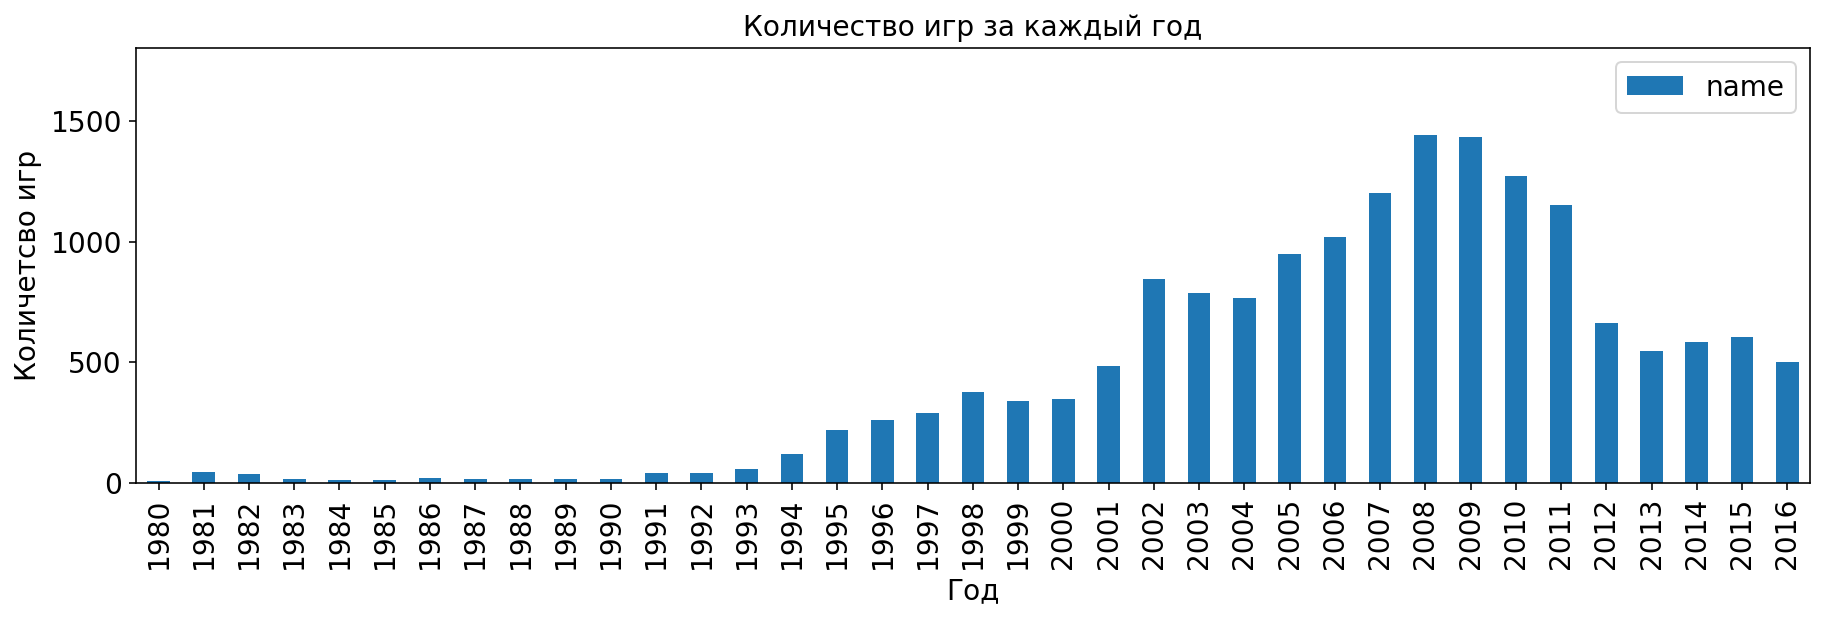

In [61]:
drawPlot(games_per_year_pivot,title='Количество игр за каждый год', kind='bar',sizeMax=15,sizeMin=4,xlabel='Год',ylabel='Количетсво игр',ylimMax=1800)

График имеет положительный тренд до *2008 года*, после идет спад. Последние 4 года, количество игр колеблиться в пределах 500-600 в год. Трудно определить, сколько в среднем выпускается игр в месяц, однако, можно смело утверждать, что со временем количество игр увеличивалось. За 28 лет (1980 *минимальное количество* - 2008 *максимальное количетсво*) количество игр увеличилось в **160** раз. Спад после 2008 года образовался из-за кризиса 2008 года.  Нашел очень хорошую статью про спад после 2008 года. https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda . Также можем сказать, что часть рынка на себя забрали мобильные игры.

Брать данные за все периоды будет нерациональным решением. Возьмем данные начиная с *2002* года, потому что в этом году произошел довольно ощутимый скачок +300 игр по сравнению с 2001 годом. Можно утверждать, что в этом году произошел бум в игровой индустрии. http://news.bbc.co.uk/hi/russian/sci/tech/newsid_2065000/2065475.stm

In [62]:
games_stats = games_stats.query('year_of_release >= 2002')

<a id="diffPlatformPerSales"></a>
## Как менялись продажи по платформам

Посмотрим как менялись продажи по платформам и установим срок актуальности платформы. Выберим платформы с наибольшими суммарными продажами и построим графики распределение по годам.

Создадим функцию для отрисовки графиков

In [63]:
def drawPlotAdvanced(df,suptitle_param,x_param,y_param,hue_param,xlabel_param,ylabel_param,plotKind):
    if plotKind == "lineplot":
        sns.set(rc={'figure.figsize':(14,5)})
        plt.suptitle(suptitle_param)
        ax = sns.lineplot(x = x_param,y=y_param,data=df,hue = hue_param,palette=('Set1'),linewidth=2)
        ax.set(xlabel=xlabel_param,ylabel=ylabel_param)
        plt.show()
    elif plotKind == "boxplot":
        sns.set(rc={'figure.figsize':(14,5)})
        plt.suptitle(suptitle_param)
        ax = sns.boxplot(x = x_param,y=y_param,data=df)
        ax.set(xlabel=xlabel_param,ylabel=ylabel_param)
        plt.show()

Сгруппируем данные по платформам, посчитаем суммарные продажи с помощью *pivot_table* и отсортируем их по суммарным продажам с помощью метода *sort_values()*.

In [64]:
platform_total_sale_pivot = games_stats.pivot_table(index='platform',values='total_sales',aggfunc='sum')
platform_total_sale_pivot_sorted  = platform_total_sale_pivot.sort_values(by='total_sales',ascending=False)

Возьмём топ-5 платформ с наибольшими суммарными продажами.

In [65]:
platform_total_sale_pivot_sorted.head()

,total_sales
platform,
PS2,1040.610
X360,966.610
PS3,935.190
Wii,903.310
DS,804.260


Сделаем отдельные генеральные совокупности по каждой из топ-5 платформ.

In [66]:
ps2_total_sales = games_stats.query('platform == "PS2"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
x360_total_sales = games_stats.query('platform == "X360"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
ps3_total_sales = games_stats.query('platform == "PS3"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
wii_total_sales = games_stats.query('platform == "Wii"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
ds_total_sales = games_stats.query('platform == "DS"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)

Соединим их в общий *dataframe*.

In [67]:
top_5_platform_sales = ps2_total_sales.append(x360_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(ps3_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(wii_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(ds_total_sales,ignore_index=True)

Сгруппируем данные по платформе и год выпуска игры, посчитаем суммарные продажи.

In [68]:
top_5_platform_sales_pivot = top_5_platform_sales.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

Посторим график.

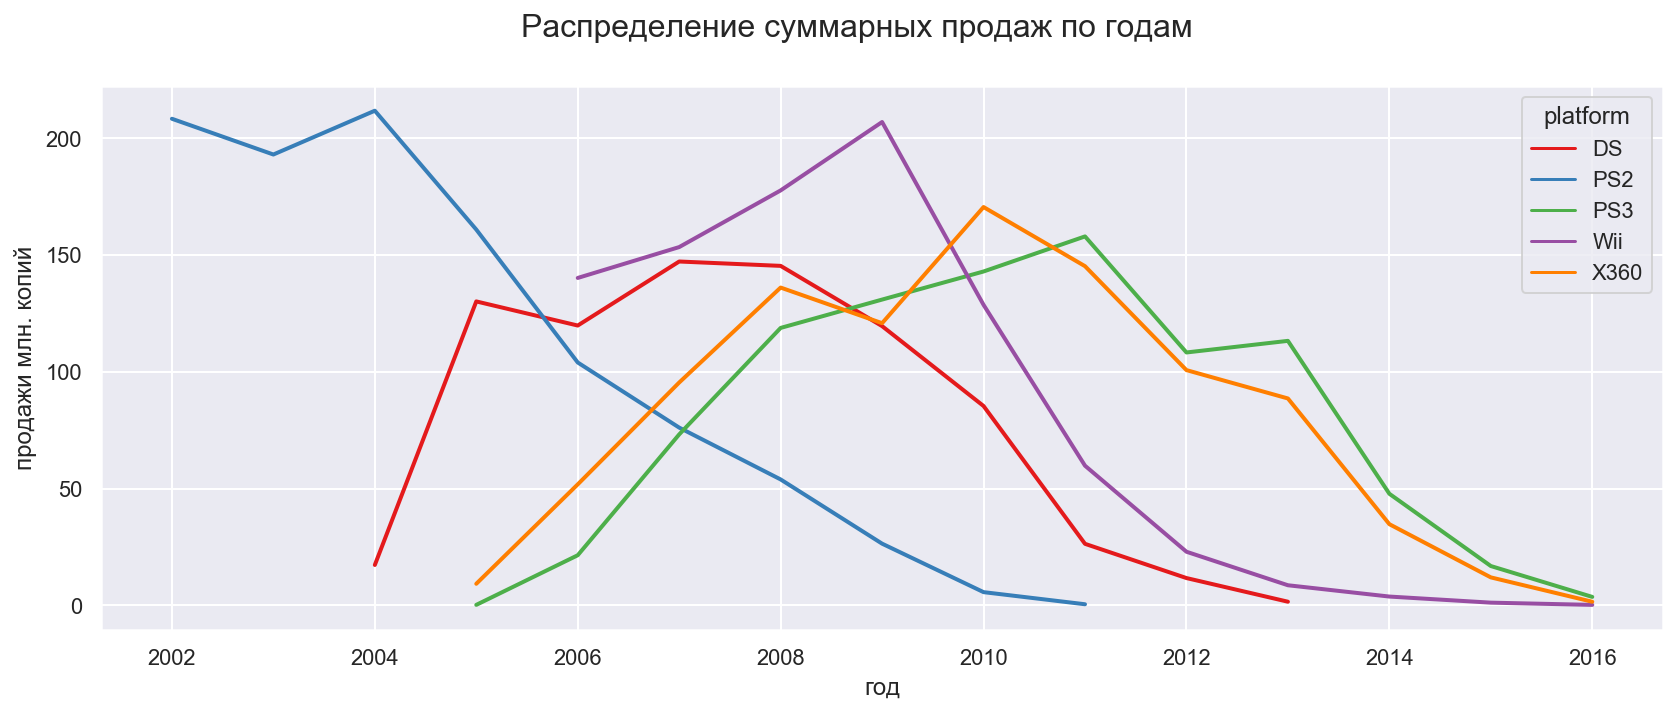

In [69]:
drawPlotAdvanced(top_5_platform_sales_pivot,"Распределение суммарных продаж по годам",'year_of_release','total_sales','platform',"год","продажи млн. копий","lineplot")

Разберем каждую платформу.

### DS

Продажи резко возрасли до ~2007 (максимальная суммарная продажа 150млн). После, последовал спад в продажах. Скорее всего, консоль стала невостребованной после 2008 года.

### PS2
В периоде 2000-2004 был взрывной рост. Консоль начала завоёвывать рынок в этот период. После ~2004 года, рост продаж пошел на спад, потому что появились новые игроки(консоли) на рынке. 

### PS3 и Xbox 360
Сюдя по графику, можно сделать вывод, что обе консоли имели похожие продажи на протяжении 10 лет. Пик популярности 2010 год - *Xbox 360*. Пик популярности ~2011-12 - *PS3*. После пиков идет спад в продажах.

### Wii
Продажи стартовали с отметки 150млн копий в ~2006. Рост продаж идет до 2008 года(пик популярности), после идет резкий спад. 

<br>

Чтобы определить срок актуальности платформы, применим правило 3-х сигм. В частности, возьмем промежуток ($\mu$ + $\sigma$) ($\mu$ - $\sigma$) - большинство значений будут находиться в этом промежутке, следовательно, можно предположить, что в этот промежуток и есть - срок востребованности платформы.


Напишем функцию, которая будет возвращать срок востребованности платформы.

In [70]:
def demandPeriod(df):
    return int((df['year_of_release'].mean() + df['year_of_release'].std()) - 
                     (df['year_of_release'].mean() - df['year_of_release'].std()))

In [71]:
ps2_sales = top_5_platform_sales_pivot.query('platform == "PS2"')
ps3_sales = top_5_platform_sales_pivot.query('platform == "PS3"')
wii_sales = top_5_platform_sales_pivot.query('platform == "Wii"')
x360_sales = top_5_platform_sales_pivot.query('platform == "X360"')
ds_sales = top_5_platform_sales_pivot.query('platform == "DS"')
# Срок востребованности платформы - PS2
ps2_demand_period = demandPeriod(ps2_sales)
# Срок востребованности платформы - PS3
ps3_demand_period = demandPeriod(ps3_sales)
# Срок востребованности платформы - Wii
wii_demand_period = demandPeriod(wii_sales)
# Срок востребованности платформы - Xbox 360
x360_demand_period = demandPeriod(x360_sales)
# Срок востребованности платформы - DS
ds_demand_period = demandPeriod(ds_sales)

Создадим *dataframe* - срок актуальности платформ.

In [72]:
demandPeriod_df = pd.DataFrame({'платформа': ['PS2','PS3','Wii','Xbox 360','DS'], 'срок': [ps2_demand_period,ps3_demand_period
                                                                                           ,wii_demand_period,x360_demand_period
                                                                                          ,ds_demand_period]})
demandPeriod_df

,платформа,срок
0,PS2,6
1,PS3,7
2,Wii,6
3,Xbox 360,7
4,DS,6


In [73]:
print('Средний срок актуальности платформы: ',round(demandPeriod_df['срок'].mean()))

Средний срок актуальности платформы:  6.0


Мы определили срок актуальности платформы - **6 лет**.

<a id="demandPeriod"></a>
## Определение актуального периода

Основываясь на выводах предыдущих вопросах, возьмем данные за последние 6 лет (средний срок актуальности платформы). Тем самым сохраним важную информацию, так как мы можем увидеть в этом периоде пик продаж, рост и падение.

Возьмём совокупность за последние 6 лет, т.е начиная с 2011 года.

In [74]:
games_stats_2011 = games_stats.query('year_of_release >= 2011')

In [75]:
games_stats_2011.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score         11
user_score            4
rating             1533
rating_num            0
total_sales           0
dtype: int64

За этот период мы сможем увидеть падение текущих для того периода консолей и рост продаж новых консолей.

<a id="leaderPlatform&SearchProspective"></a>
## Лидирующие платформы, поиск перспективных платформ

Необходимо найти лидирующие платформы за актуальный период.

In [76]:
leader_platforms = games_stats_2011.pivot_table(index='platform',values='total_sales',aggfunc='sum')
leader_platforms_sorted = leader_platforms.sort_values(by='total_sales',ascending = False)
leader_platforms_sorted.head(10)

,total_sales
platform,
PS3,447.690
X360,382.750
PS4,314.140
3DS,258.210
XOne,159.320
PC,98.670
Wii,96.390
WiiU,82.190
PSV,53.810


Топ-5 лидирующих платформ: *PS3*,*Xbox 360*,*PS4*,*3DS*,*XOne*. 3 корпорации возглавляют рынок игровой индустрии:
1. Sony
2. Microsoft
3. Nintendo

Сгруппируем данные по платформе и год выпуска игры, посчитаем суммарные продажи.

In [77]:
leader_platforms_pivot = games_stats_2011.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

Построим график.

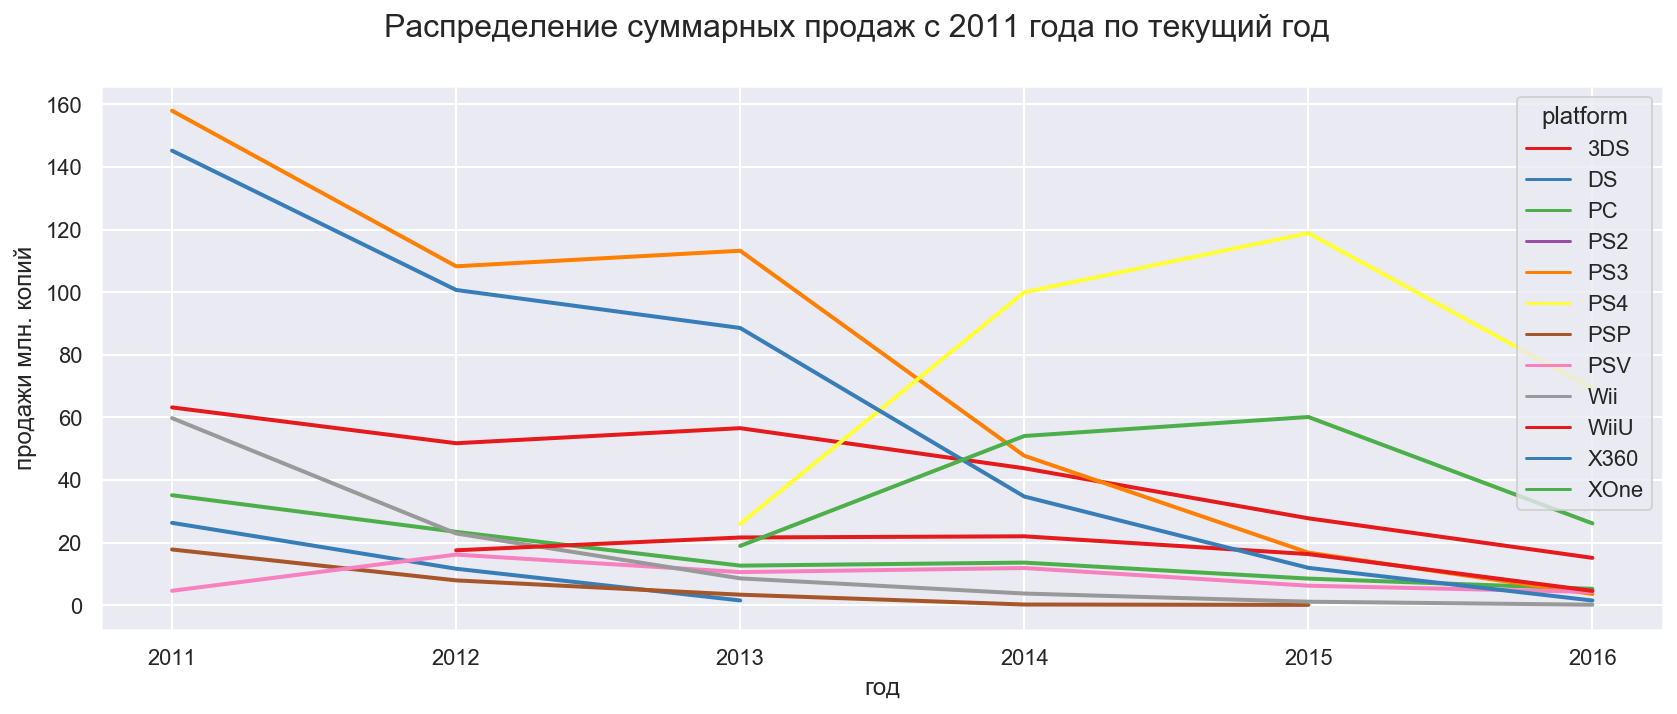

In [78]:
drawPlotAdvanced(leader_platforms_pivot,"Распределение суммарных продаж c 2011 года по текущий год",'year_of_release','total_sales','platform',"год","продажи млн. копий","lineplot")

Основываясь на графике, можно сделать вывод:
1. Консоли прошлого поколения становятся неактульными. Если посмотреть на график *PS3* и *Xbox 360*, *Wii*, рост продаж падает с каждым годом.
2. Консоли нового поколения показывают актуальность: *PS4*, *Xbox One*,*WiiU*.

Посмотрим более внимательно на консоли прошлого поколения и нового поколения.

### Консоли прошлого поколения

In [79]:
ps3_sales_2011 = games_stats_2011.query('platform == "PS3"')
xbox360_sales_2011 = games_stats_2011.query('platform == "X360"')
wii_sales_2011 = games_stats_2011.query('platform == "Wii"')

Сгруппируем данные году выпуска игры, посчитаем суммарные продажи.

In [80]:
ps3_sales_2011_pivot = ps3_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
xbox360_sales_2011_pivot = xbox360_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
wii_sales_2011_pivot = wii_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')

Воспользуемся функцией *drawplot()*. Построим графики для каждой платформы.

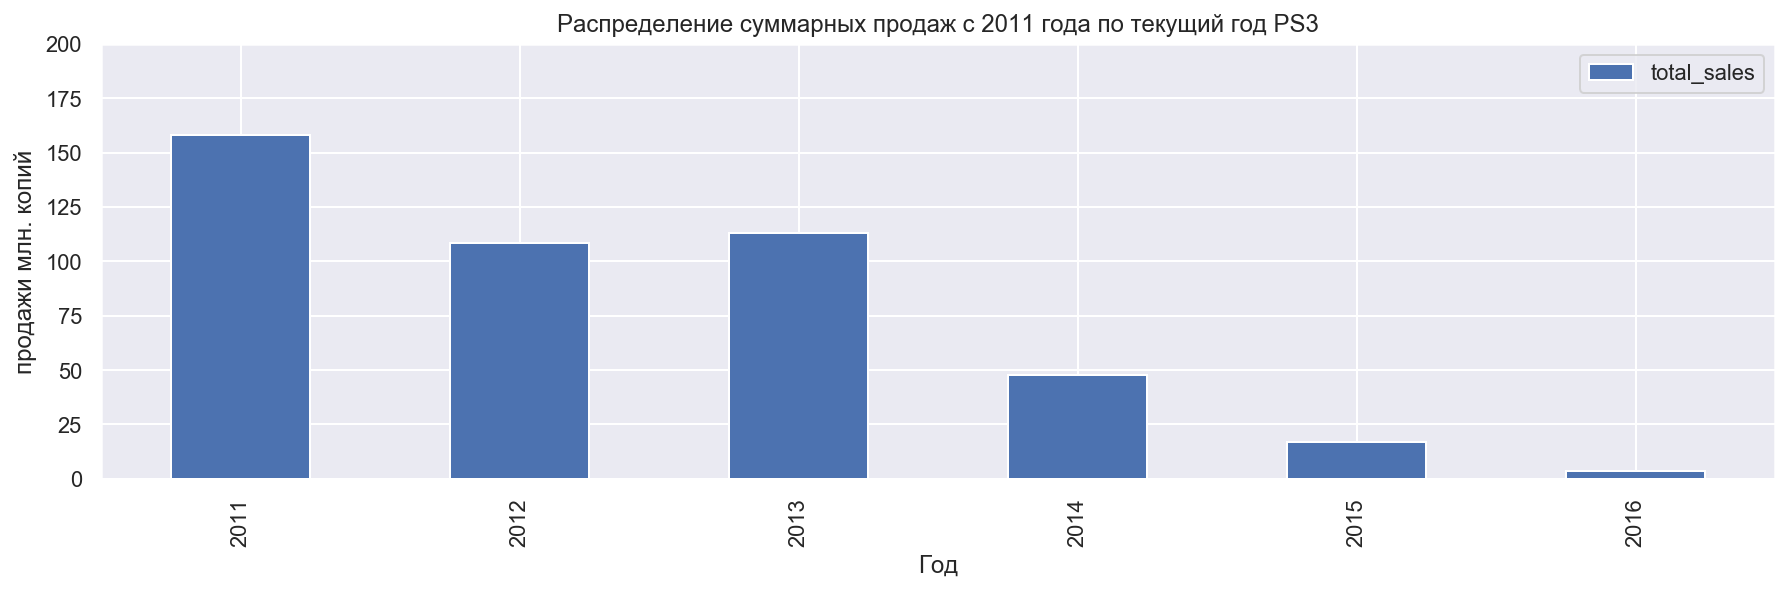

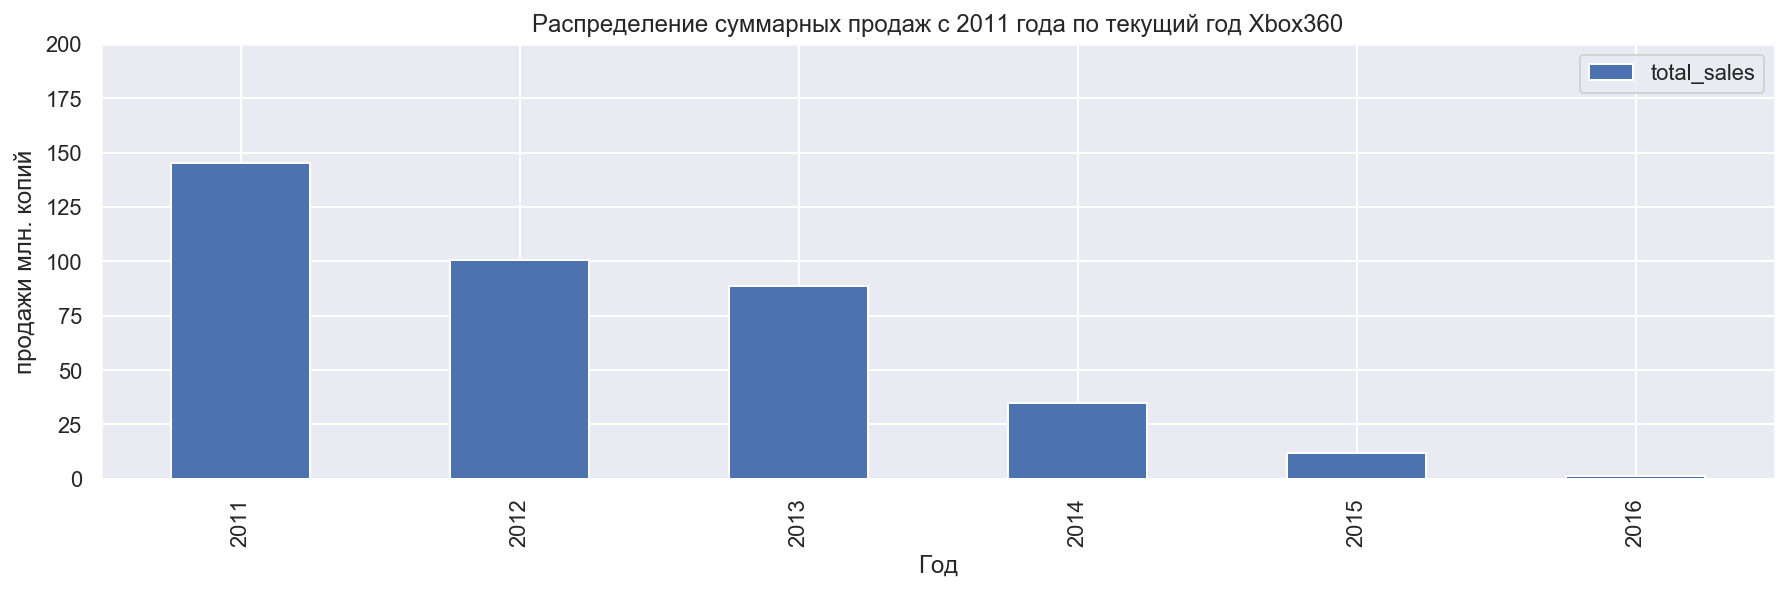

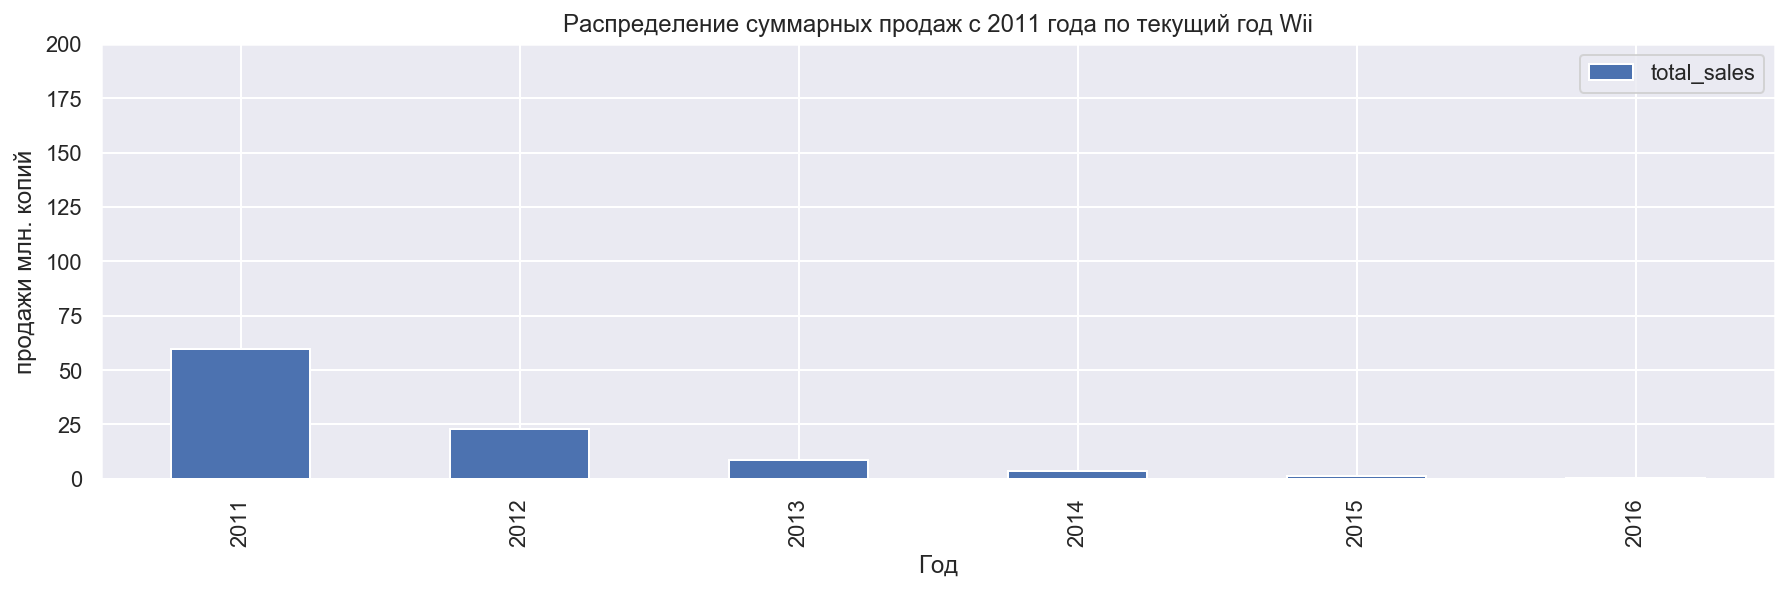

In [81]:
old_platforms = {
    'PS3': ps3_sales_2011_pivot,
    'Xbox360': xbox360_sales_2011_pivot,
    'Wii': wii_sales_2011_pivot
}

for platform in old_platforms.keys():
    drawPlot(old_platforms[platform],title=f'Распределение суммарных продаж c 2011 года по текущий год {platform}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Год',ylabel='продажи млн. копий',ylimMax=200)

Как мы видим, продажи с каждым годом падают, следовательно популярность тоже падает. Рассмотрим консоли нового поколения.

### Консоли нового поколения

In [82]:
ps4_sales_2011 = games_stats_2011.query('platform == "PS4"')
xboxOne_sales_2011 = games_stats_2011.query('platform == "XOne"')
wiiU_sales_2011 = games_stats_2011.query('platform == "WiiU"')

Сгруппируем данные году выпуска игры, посчитаем суммарные продажи.

In [83]:
ps4_sales_2011_pivot = ps4_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
xboxOne_sales_2011_pivot = xboxOne_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
wiiU_sales_2011_pivot = wiiU_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')

Воспользуемся функцией *drawplot()*. Построим графики для каждой платформы.

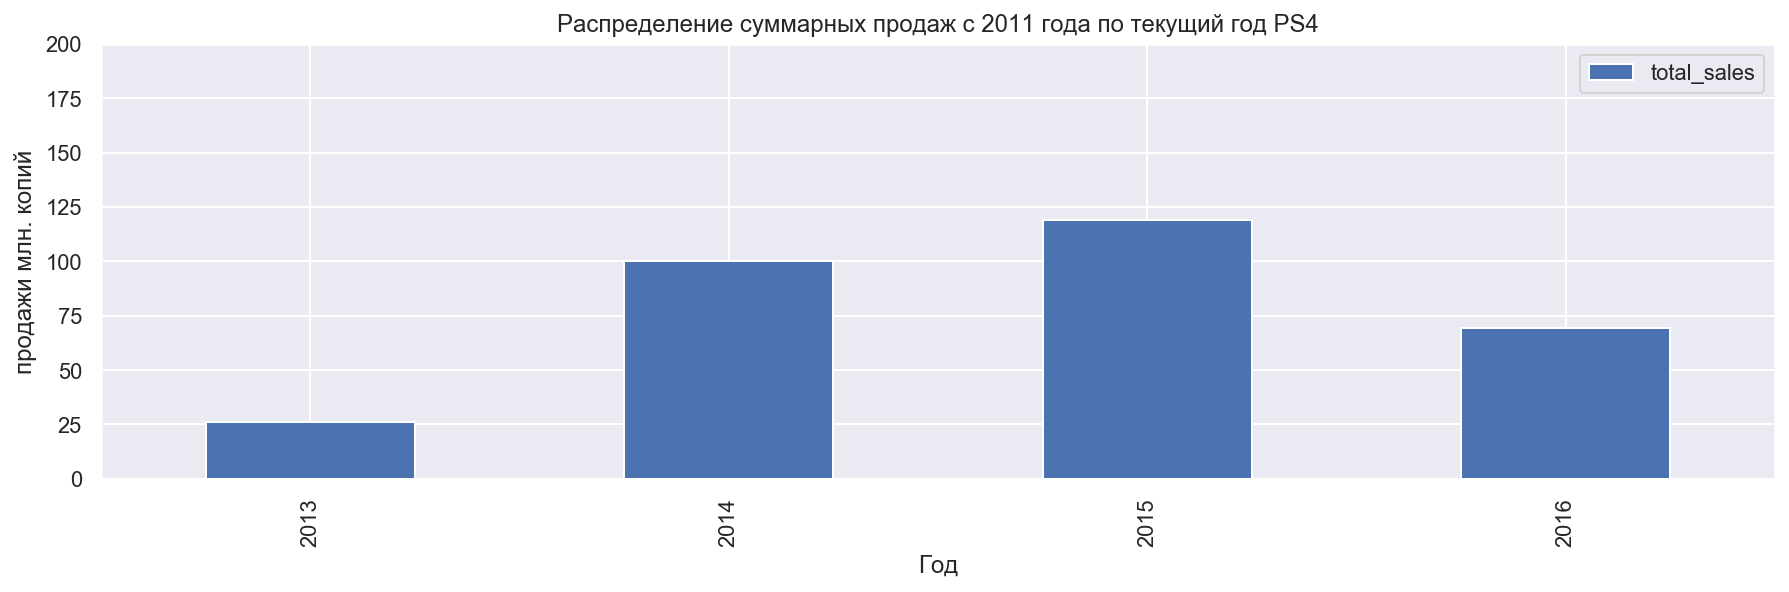

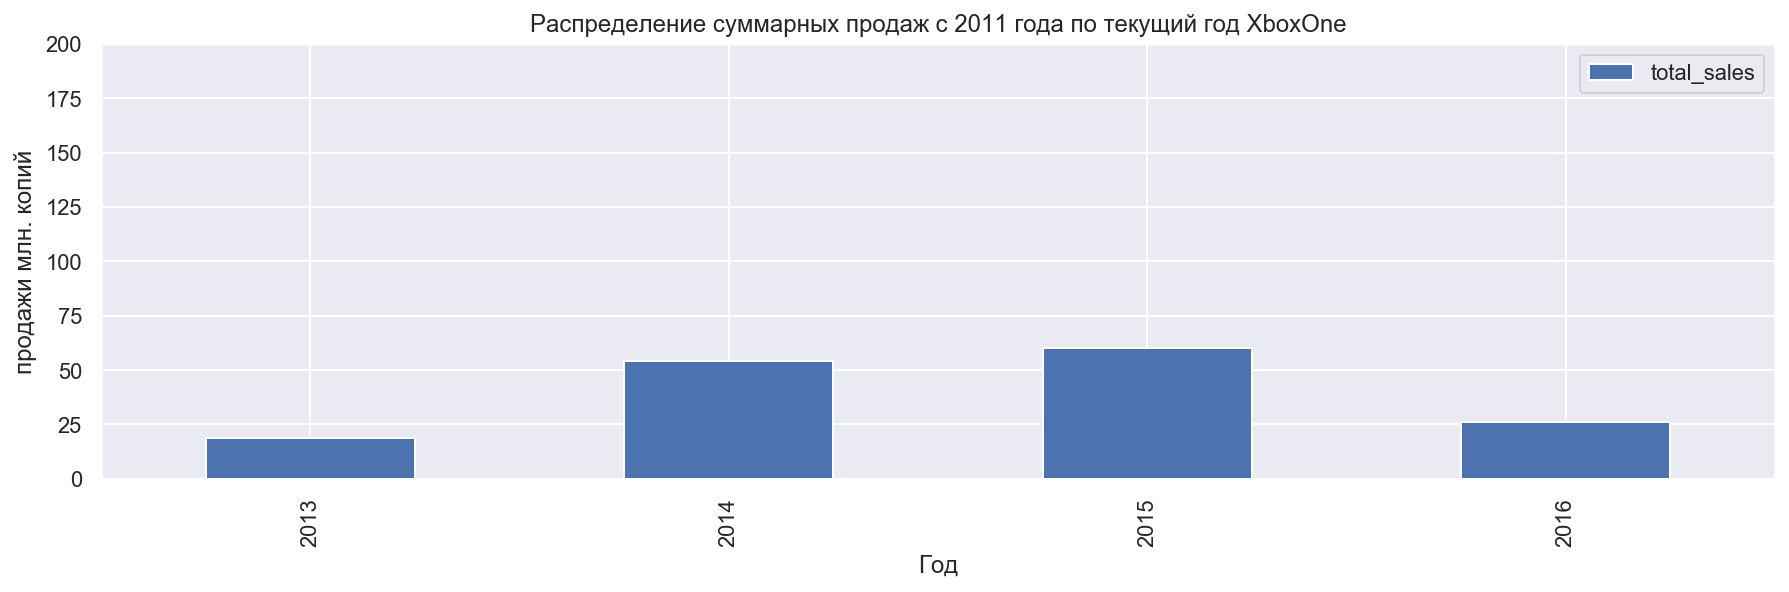

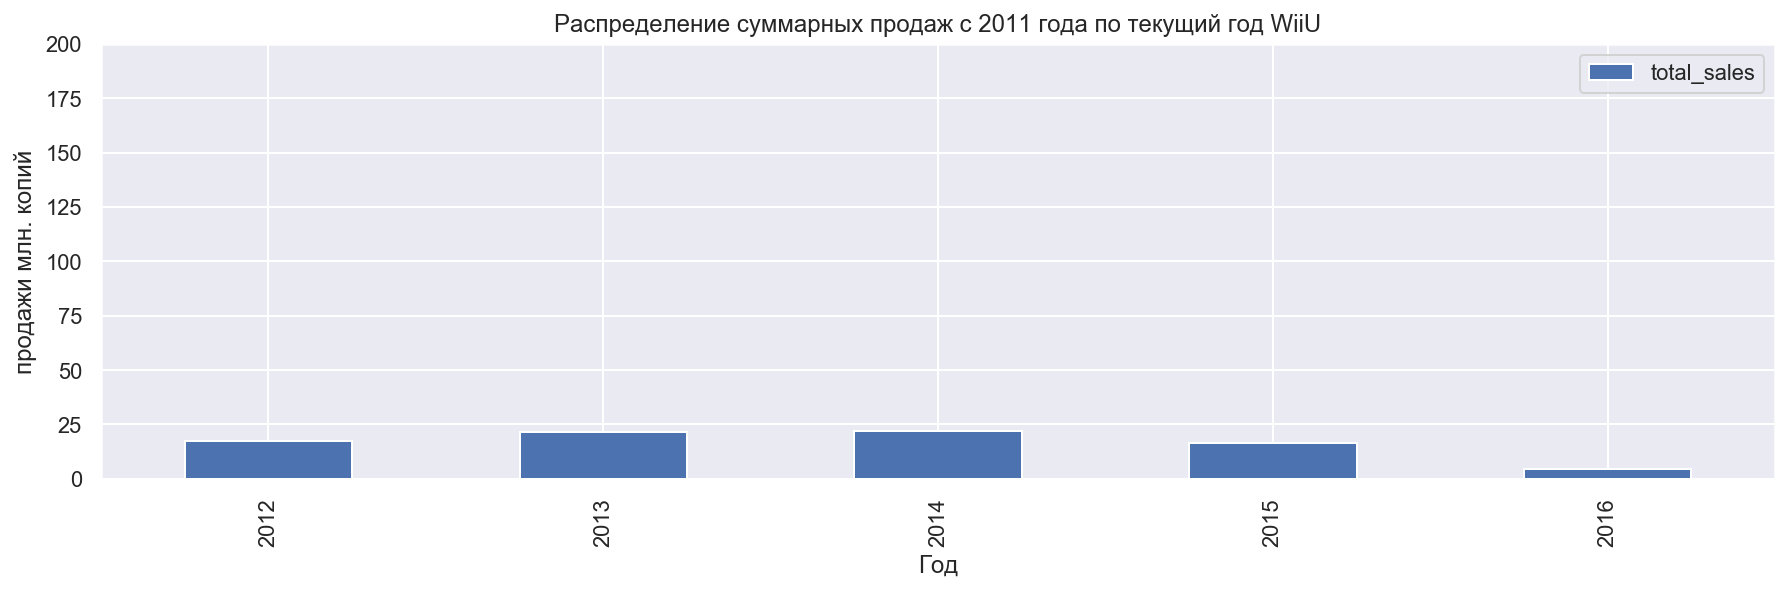

In [84]:
new_platforms = {
    'PS4': ps4_sales_2011_pivot,
    'XboxOne': xboxOne_sales_2011_pivot,
    'WiiU': wiiU_sales_2011_pivot 
}

for platform in new_platforms.keys():
    drawPlot(new_platforms[platform],title=f'Распределение суммарных продаж c 2011 года по текущий год {platform}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Год',ylabel='продажи млн. копий',ylimMax=200)

Ситуация с консолями нового поколения различается. Продажи показали рост и небольшой спад. Консоли нового поколения можно считать перспективными платформами. Прошло не так уж и много времени для срока актуальности. Возможно эти консоли покажут прибыль в следующем году, может игры новые выйдут тем самым продажа для этих консолей увеличиться.

<a id="distGlobalSalesPerPlatform"></a>
## Распределение по глобальным продажам в разбивке по платформам

Посмотрим на распределение по глобальным продажами в разбивке платформам.

In [85]:
platform_global_sales = games_stats_2011.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').reset_index()

Построим диаграмму размаха.

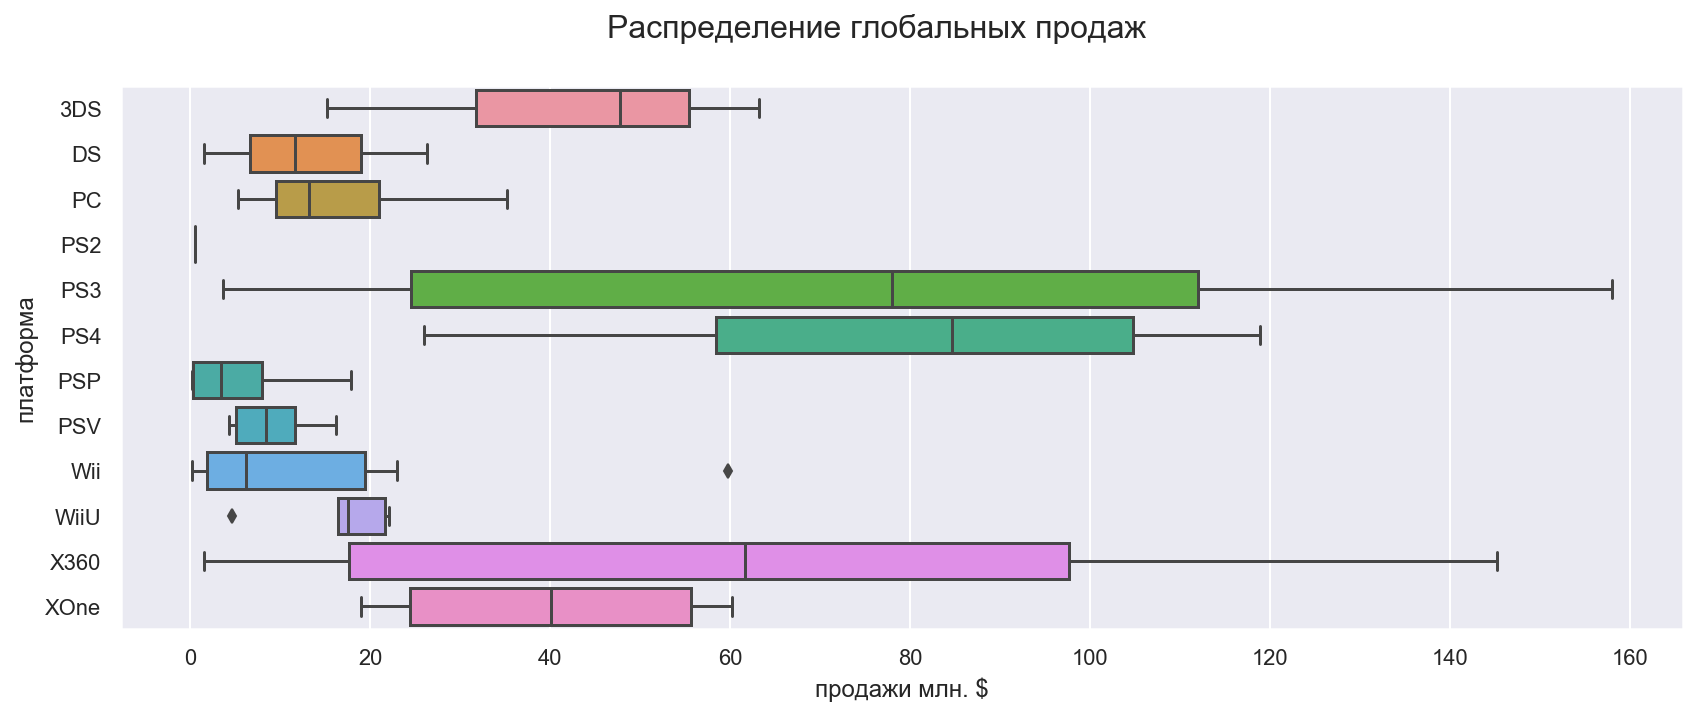

In [86]:
drawPlotAdvanced(platform_global_sales, "Распределение глобальных продаж",'total_sales','platform',None,"продажи млн. $","платформа","boxplot")

Лидеры по глобальным продажам: *Xbox 360*,*PS3*. Большинство значений лежит в диапазоне от 25млн до 115 млн копий. В среднем Xbox 360 - 60млн. копий, PS3 - 80млн. копий. Консоли нового поколения не отстают в продажах. *3DS* - глобальные продажи похожи схожи с продажами на *Xbox One*. Менее популярные платформы: *PSP*,*PSV*,*WiiU* - "портативные консоли"

Посмотрим на распределение по глобальным продажами в разбивке по перспективным платформам. Построим диаграмму размаха.

In [87]:
perspective_platforms = ps4_sales_2011.append(xboxOne_sales_2011,ignore_index=True)
perspective_platforms = perspective_platforms.append(wiiU_sales_2011,ignore_index=True)
# Сгруппируем данные по платформе и году выпуска игры.
perspective_platforms_global_sales = perspective_platforms.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

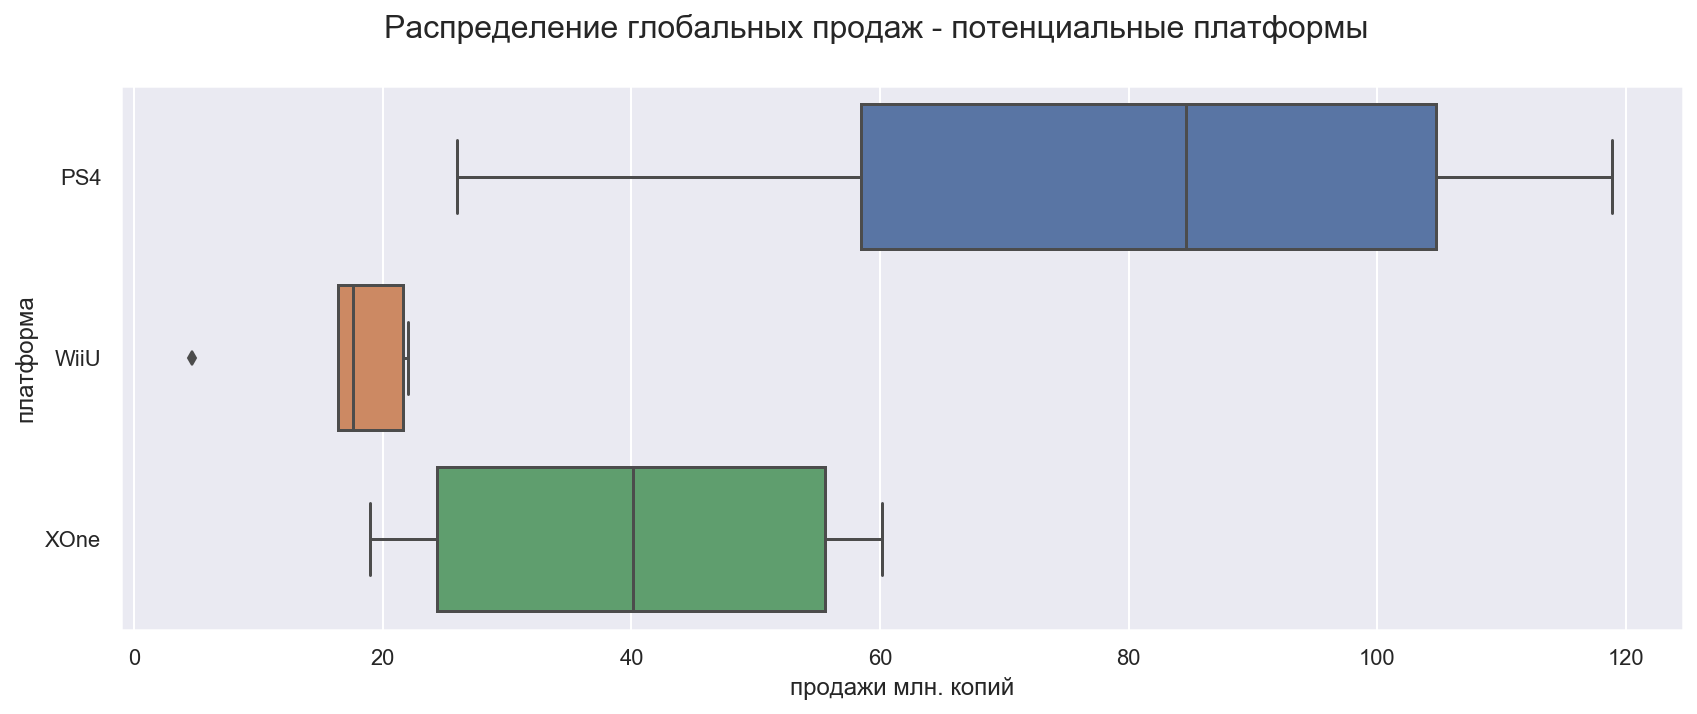

In [88]:
drawPlotAdvanced(perspective_platforms_global_sales, "Распределение глобальных продаж - потенциальные платформы",'total_sales','platform',None,"продажи млн. копий","платформа","boxplot")

1. PS4 - большинство продаж лежит в диапазоне от 60 до 105 млн. копий. В среднем около 84 млн долларов. PS4 является самой прибыльной платформой по сравнению с другими платформами.
2. WiiU - суммарное число продаж не доходит до 25млн. копий. Следовательно, можем считать её менее прибыльной. Может быть какие-нибудь игры от известных студий улучшат ситуацию.
3. Xbox One - Большинство продаж лежит в диапазоне от 23млн до 57 млн копий. В среднем около 40 млн копий - каждый год продается на этой платформе. 

WiiU - менее прибыльная платформа, так как целом портативные платформы(консоли) менее популярны. Что насчёт остальных платформ, PS4 оказался самой популярной платформой из-за большого количества эксклюзивных игр. У Sony есть собственный набор эксклюзивных игр, которые не доступны на Xbox One: Uncharted 4, Gran Turismo Sport, God of War, Death Stranding, Persona 5, Street Fighter V, The Last Guardian и многие другие. Тем временем, Xbox One может похвастаться доступностью к библиотеке игр с прошлого поколения, чего нет ни в одной консоли в мире.

В следующем году можно сделать упор на новые приставки *Xbox One* и *PS4*. Также не стоит забывать о WiiU, несмотря на то что у этой платформы пока малые продажи, но вдруг что-то произойдет и ситуация улучшиться (хотя это мало вероятно). 

<a id="userCritcScoreImpact"></a>
## Влияние отзывов пользователей и критиков на продажи

Нам нужно понять влияют ли оценки пользователей и критиков на продажи.

Возьмем наиболее перспективную платформу, в данном случае возьмем PS4 . Посмотрим корреляцию между оценками (пользователей и критиков) и продажами.

Напишем функцию, которая будет рисовать диаграммы рассеяния.

In [89]:
def drawCorrDiagram(df,x_param,y_param,kind_param,alpha_param,legend_param,title_param):
    df.plot(x=x_param,y=y_param,kind=kind_param,alpha=alpha_param,legend=legend_param,title=title_param)
    plt.show()

Посмотрим корреляцию между оценками пользователей и продажами.

Так как у нас есть пропущенные значения в столбцах *user_score* и *critic_score*. Отфильтруем данные. Возьмем выборку без пропущенных значений и исключим те строки, где рейтинг не был определен.

In [90]:
ps4_sales_2011_non_nan_user_score = non_nan_column(ps4_sales_2011,'user_score').reset_index(drop=True).query('user_score > 0')
ps4_sales_2011_non_nan_critic_score = non_nan_column(ps4_sales_2011,'critic_score').reset_index(drop=True).query('critic_score > 0')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


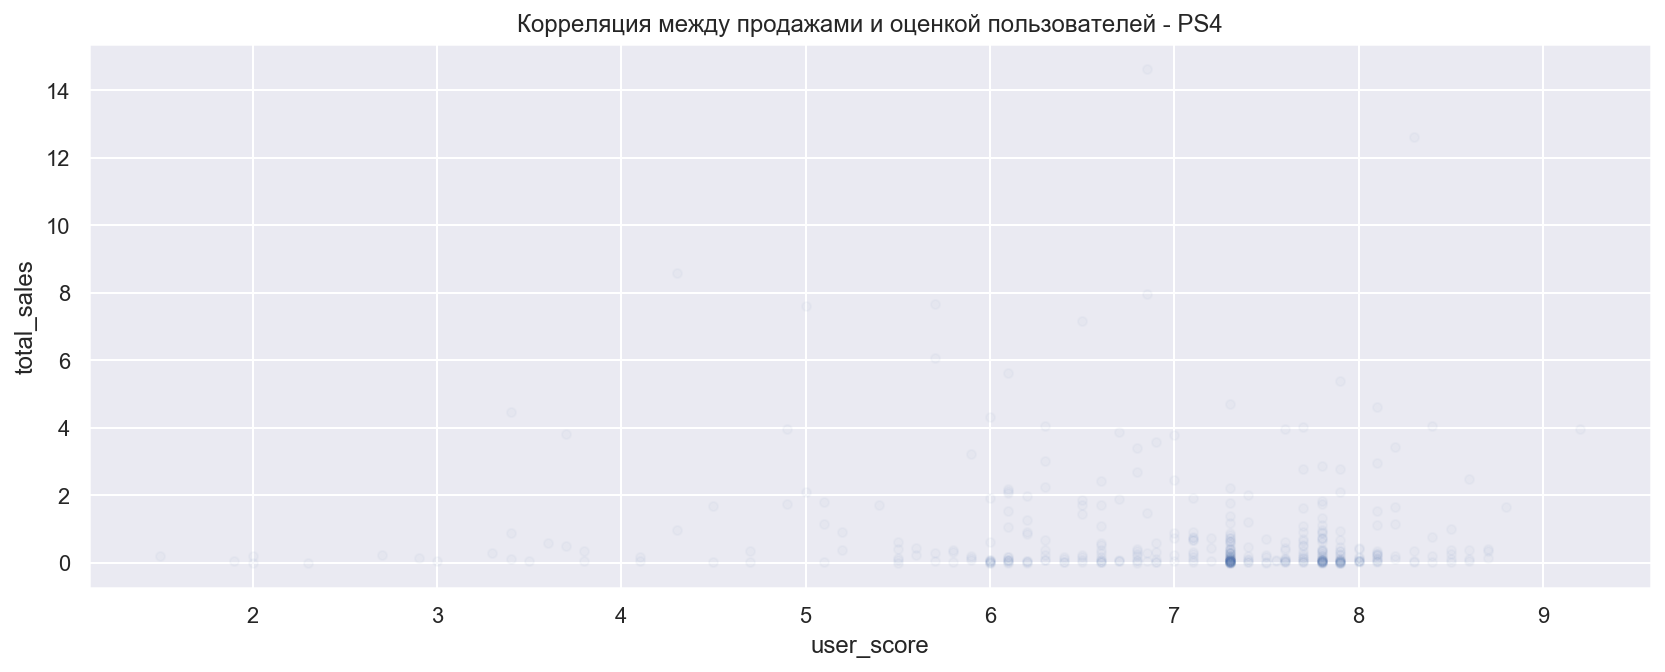

In [91]:
drawCorrDiagram(df=ps4_sales_2011_non_nan_user_score,x_param='user_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Корреляция между продажами и оценкой пользователей - PS4')

Исходя из графика, можно сделать вывод, что оценки пользователей и продажи не коррелируют между собой. Посмотрим на коэффициент Пирсона.

In [92]:
print(ps4_sales_2011_non_nan_user_score['total_sales'].corr(ps4_sales_2011_non_nan_user_score['user_score']))

-0.07278107378195338


Коэффициент Пирсона близок к нулю, значит связь слабая, либо отсутствует вовсе. 

Посмотрим корреляцию между оценками критиков и продажами.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


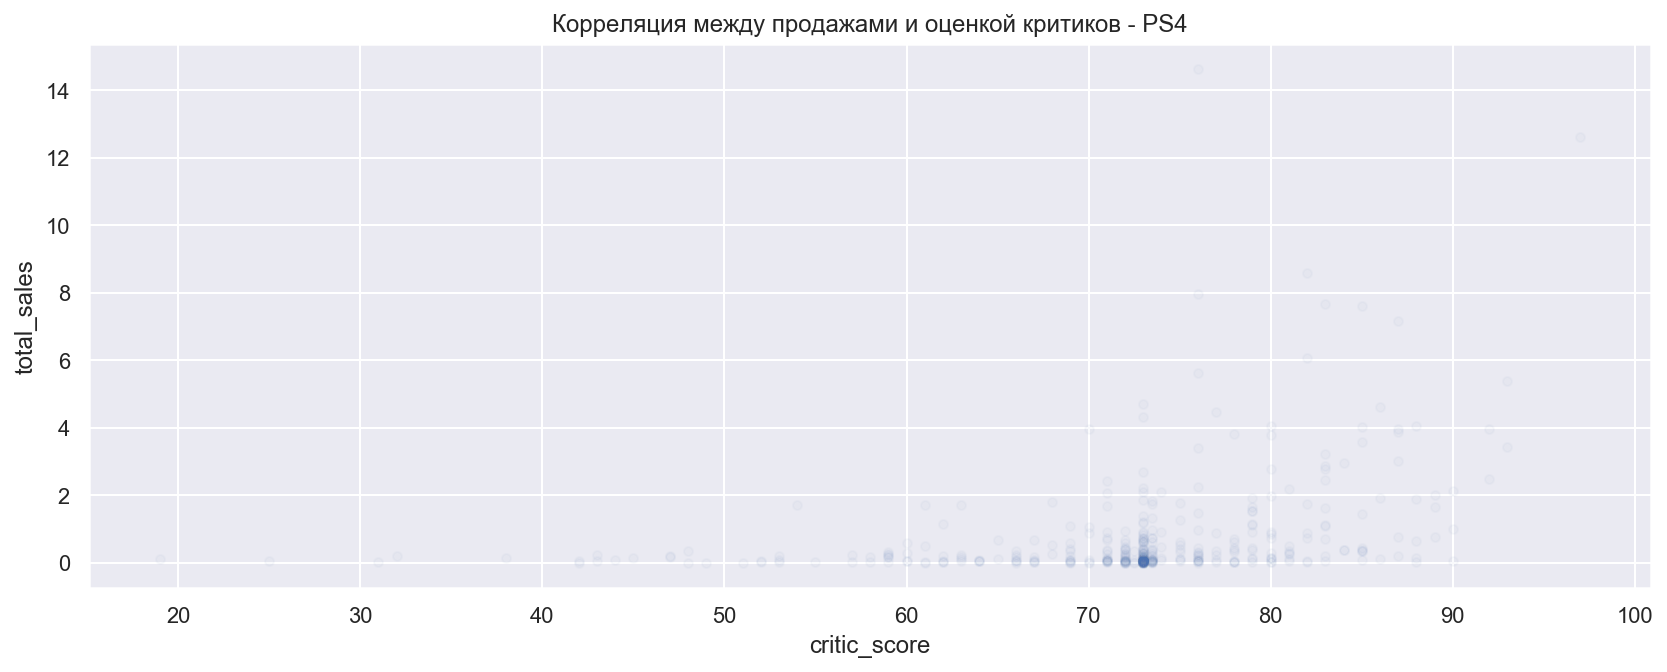

In [93]:
drawCorrDiagram(df=ps4_sales_2011_non_nan_critic_score,x_param='critic_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Корреляция между продажами и оценкой критиков - PS4')

По графику видно, что оценки критиков и продажи меньше коррелируют между собой. Посмотрим на коэффициент Пирсона.

In [94]:
print(ps4_sales_2011_non_nan_critic_score['total_sales'].corr(ps4_sales_2011_non_nan_critic_score['critic_score']))

0.33476893281096876


Коэффициент Пирсона равен 0.33 - есть связь, но она слабая. Следовательно, оценки критиков не всегда влияют на продажи игры.

Что насчёт других консолей? Такая ситуация только у PS4? Посмотрим на корреляцию в других потенциальных консолей. Возьмём Xbox One.

Так как у нас есть пропущенные значения в столбцах *user_score* и *critic_score*. Отфильтруем данные. Возьмем выборку без пропущенных значений и исключим те строки, где рейтинг не был определен.

In [95]:
xboxOne_sales_2011_non_nan_user_score = non_nan_column(xboxOne_sales_2011,'user_score').reset_index(drop=True).query('user_score > 0')
xboxOne_sales_2011_non_nan_critic_score = non_nan_column(xboxOne_sales_2011,'critic_score').reset_index(drop=True).query('critic_score > 0')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


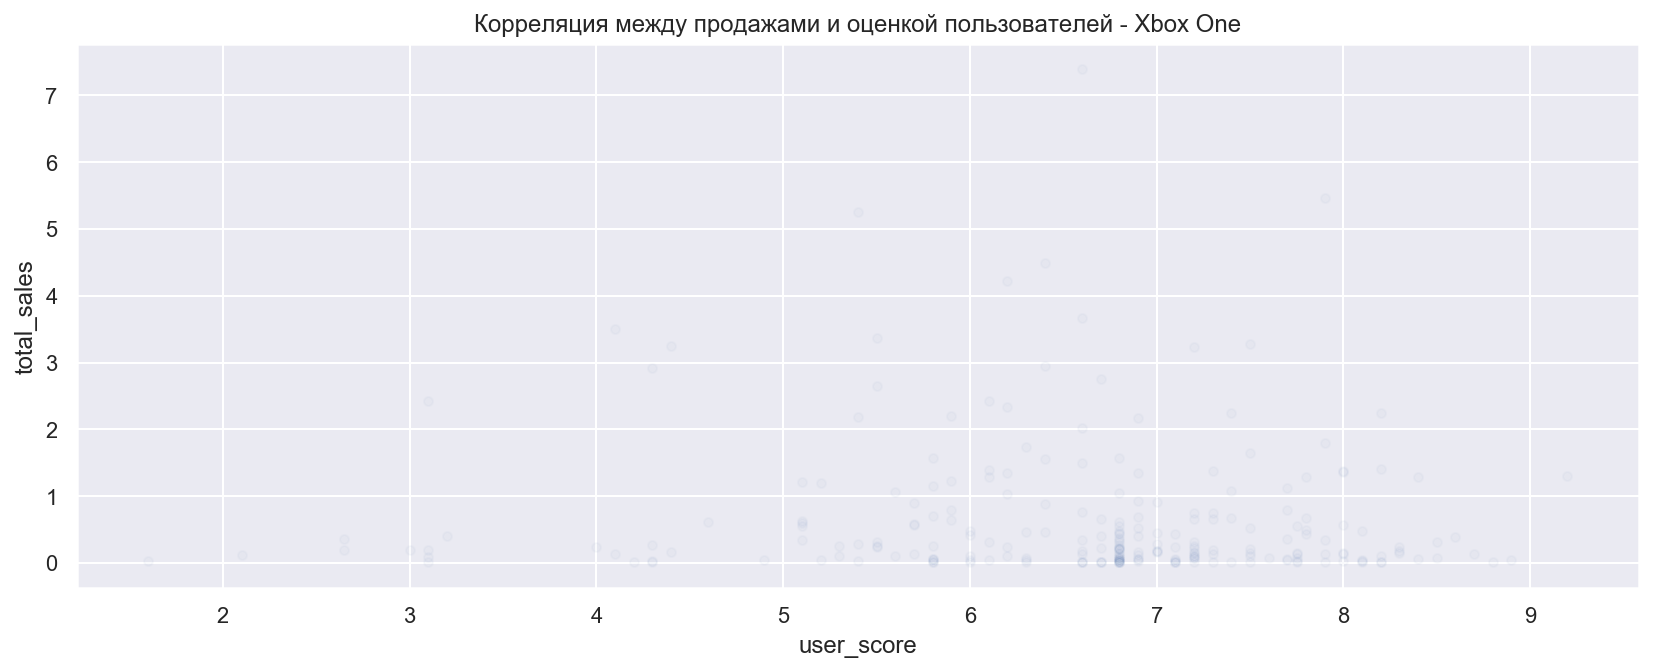

In [96]:
drawCorrDiagram(df=xboxOne_sales_2011_non_nan_user_score,x_param='user_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Корреляция между продажами и оценкой пользователей - Xbox One')

Видим практические ту же ситуацию с PS4. Посмотрим на коэффициент Пирсона.

In [97]:
print(xboxOne_sales_2011_non_nan_user_score['total_sales'].corr(xboxOne_sales_2011_non_nan_user_score['user_score']))

-0.06876720540266656


Коэффициент Пирсона близок к 0, связь очень слабая либо её вовсе нету.

Посмотрим корреляцию между оценками критиков и продажами.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


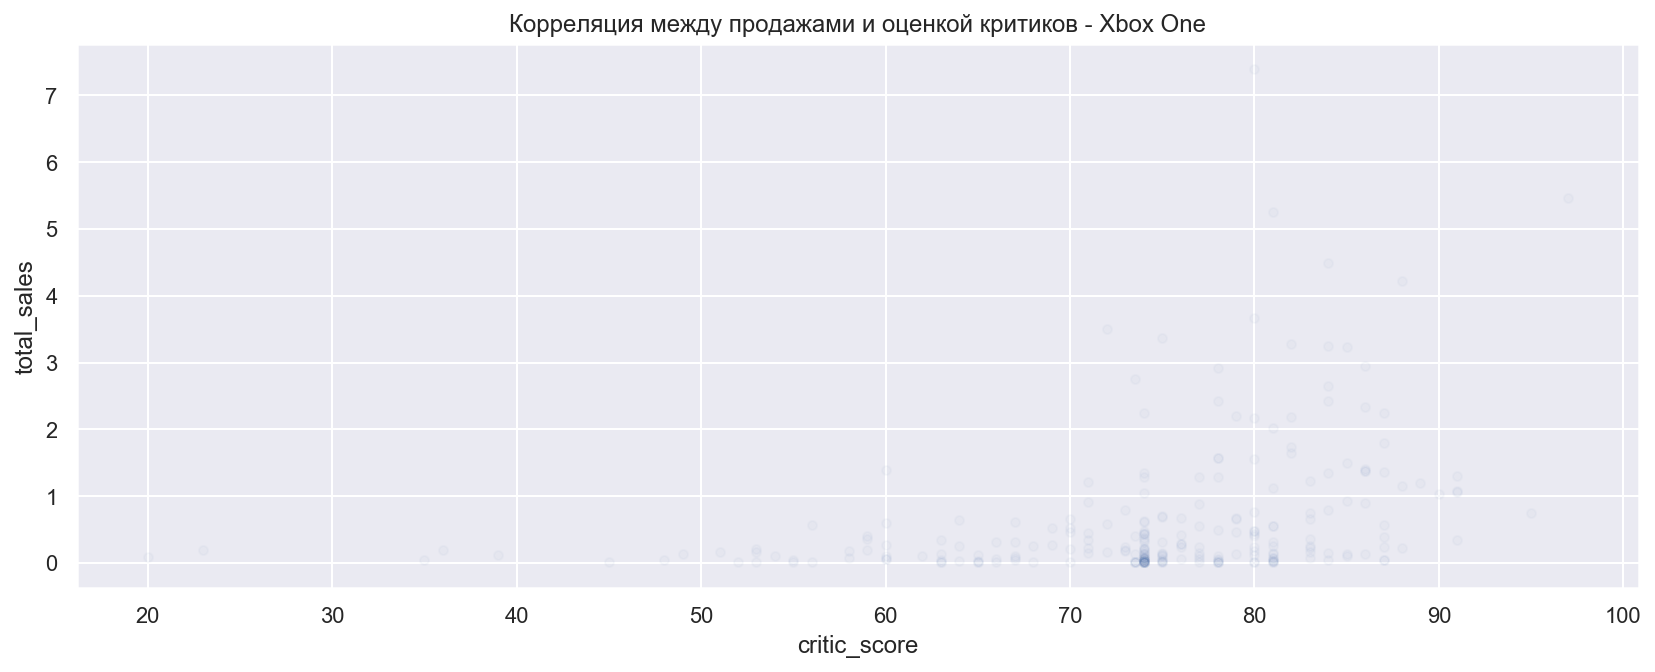

In [98]:
drawCorrDiagram(df=xboxOne_sales_2011_non_nan_critic_score,x_param='critic_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Корреляция между продажами и оценкой критиков - Xbox One')

Тоже самое. Видно слабую корреляцию. Рассмотрим коэффициент Пирсона.

In [99]:
print(xboxOne_sales_2011_non_nan_critic_score['critic_score'].corr(xboxOne_sales_2011_non_nan_critic_score['total_sales']))

0.33155145507232087


Коэффициент Пирсона равен 0.33 - есть связь, но она слабая. Следовательно, оценки критиков не всегда влияют на продажи игры для платформы *Xbox*.

В целом, оценки пользователей не влияют на суммарные продажи игр для перспективных консолей.Тем временем, оценки критиков влияют, но не всегда.

<a id="gameDistPerGenre"></a>
## Распределение игр по жанрам

Нам необходимо посмотреть на общее распределение игр по жанрам. Найдем прибыльные жанры. Какие жанры имеют высокую продаваемость а какие низкую? 

Сгруппируем данные по жанру, и посчитаем суммарные продажи.

In [100]:
games_genre_dist = games_stats_2011.pivot_table(index='genre',values='total_sales',aggfunc='sum')
games_genre_dist

,total_sales
genre,
Action,565.220
Adventure,45.040
Fighting,66.900
Misc,139.910
Platform,88.680
Puzzle,9.850
Racing,88.310
Role-Playing,245.630
Shooter,402.960


Отсортируем, найдем прибыльные жанры.

In [101]:
games_genre_dist_sorted = games_genre_dist.sort_values(by='total_sales',ascending=False)
games_genre_dist_sorted

,total_sales
genre,
Action,565.220
Shooter,402.960
Role-Playing,245.630
Sports,237.400
Misc,139.910
Platform,88.680
Racing,88.310
Fighting,66.900
Simulation,50.260


Построим график для наглядности.

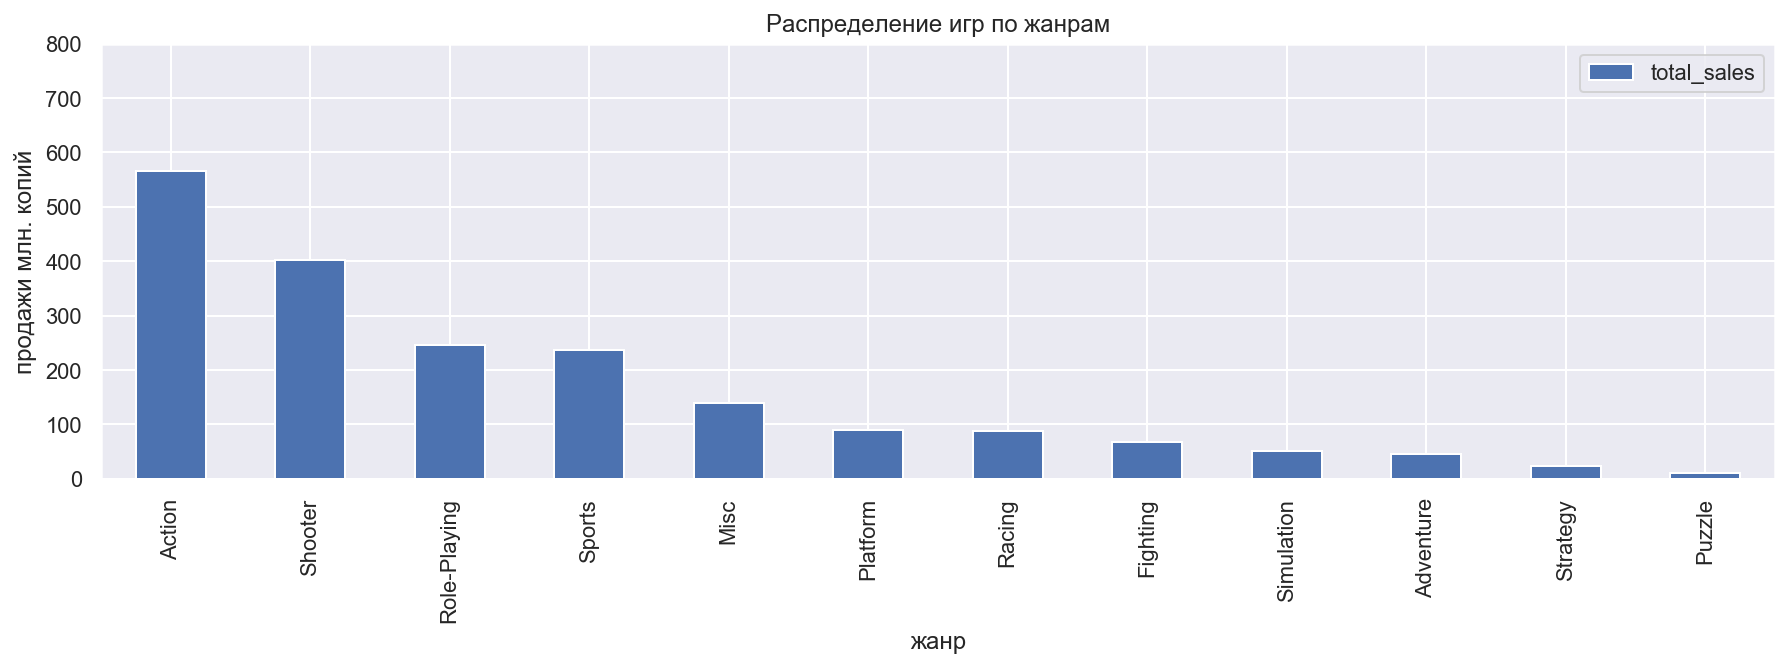

In [102]:
drawPlot(games_genre_dist_sorted,title='Распределение игр по жанрам', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='жанр',ylabel='продажи млн. копий',ylimMax=800)

Возглавляют распределение жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. Например, *Action* - простой гемплей, несколько кнопок - (передвижение, стрельба, и дополнительные действия). В жанре *Action* - сюжет не такой комплексный, как в жанре *Role-Playing*. В жанре *Shooter* - тоже простой геймплей и управление. *Sports* - много болельщиков спорта, которые хотят поиграть за свои любимые команды(например Fifa) и этот жанр прост в усвоении. Самыми успешными серии игр жанров *Action* и *Shooter* - являются AAA проекты: *Grand Theft Auto и Call of Duty*. https://zen.yandex.ru/media/gabestore/aa-aaa-aaaa-chto-oboznachaiut-aabbreviatury-v-geimdeve-5ca5dafa53239a00b3a77571 - крутая статья про AAA проекты, где рассказывается почему так дорого стоят эти проекты и почему они получают огромную выручку.

Менее прибыльные жанры: *Adventure*,*Strategy*,*Puzzle*.*Strategy* - из-за своей специфике жанра, порог вхождения выше чем у остальных жанрах. *Puzzle* - в этом жанре практически нет крупных проектов. *Adventure* - скорее всего подразумевается как квесты. В этом жанре очень мало или вообще нету крупных релизов.



## Вывод

Во время проведения исследовательского анализа данных мы :
1. Посчитали сколько игр выпускалось в разные годы. Последние 4 года, количество игр колеблиться в пределах 500-600 в год. Трудно определить, сколько в среднем выпускается игр в месяц, однако, можно смело утверждать, что со временем количество игр увеличивалось. За 28 лет количество игр увеличилось в **160** раз. После 2008 года, произошел спад в разработке игр. Спад после 2008 года образовался из-за кризиса 2008 года.  Нашел очень хорошую статью про спад после 2008 года. https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda
2. Определили рациональный период для выборки. Взяли данные начиная с *2002* года, потому что в этом году произошел довольно ощутимый скачок +300 игр по сравнению с 2001 годом. Можно утверждать, что в этом году произошел бум в игровой индустрии.
3. Посмотрели как менялись продажи по платформам. 
    - **DS** - Продажи резко возрасли до ~2007 (максимальная суммарная продажа 150млн). После, последовал спад в продажах. Скорее всего, консоль стала невостребованной после 2008 года.
    - **PS2** - В периоде 2000-2003 был взрывной рост. Консоль начала завоёвывать рынок в этот период. После ~2004 года, рост продаж пошел на спад, потому что появились новые игроки(консоли) на рынке. 
    - **PS3 и Xbox 360** - обе консоли имели похожие продажи на протяжении 10 лет. Пик популярности 2010 год - *Xbox 360*. Пик популярности ~2011-12 - *PS3*. После пиков идет спад в продажах.
    - **Wii** - Продажи стартовали с отметки 150млн копии в ~2006. Рост продаж идет до 2008 года(пик популярности), после идет резкий спад. 
  
4. Определили срок актуальности платформы - 6 лет. За этот период мы сможем увидеть падение текущих для того периода консолей и рост продаж новых консолей.
5. Определили лидирующие платформы. Топ-5 лидирующих платформ: *PS3*,*Xbox 360*,*PS4*,*3DS*,*Wii*. 3 корпорации возглавляют рынок игровой индустрии:
    - Sony
    - Microsoft
    - Nintendo
6. Построили график распределения продаж и выявили:
    - Консоли прошлого поколения становятся неактульными. Если посмотреть на график *PS3* и *Xbox 360*, *Wii*, рост продаж падает с каждым годом.
    - Консоли нового поколения показывают актуальность: *PS4*, *Xbox One*,*WiiU*. Их можно считать перспективными платформами. Прошло не так уж и много времени для срока актуальности. Возможно эти консоли покажут прибыль в следующем году, может игры новые выйдут тем самым продажа для этих консолей увеличиться.
7. Посмотрели распределение по продажам в разбивке по платформам. Лидеры по глобальным продажам: *Xbox 360*,*PS3*. Большинство значений лежит в диапазоне от 25млн до 115 млн копий. В среднем Xbox 360 - 60млн. копий, PS3 - 80млн. копий. Консоли нового поколения не отстают в продажах. *3DS* - глобальные продажи похожи схожи с продажами на *Xbox One*. Менее популярные платформы: *PSP*,*PSV*,*WiiU* - "портативные консоли". PS4 - большинство продаж лежит в диапазоне от 60 до 105 млн. копий. В среднем около 84 млн долларов. PS4 является самой прибыльной платформой по сравнению с другими платформами. WiiU - суммарное число продаж не доходит до 25млн. копий. Следовательно, можем считать её менее прибыльной. Может быть какие-нибудь игры от известных студий улучшат ситуацию. Xbox One - Большинство продаж лежит в диапазоне от 23млн до 57 млн копий. В среднем около 40 млн копий - каждый год продается на этой платформе. Следовательно, в следующем году можно сделать упор на новые приставки *Xbox One* и *PS4*. WiiU - менее прибыльная платформа, так как целом портативные платформы(консоли) менее популярны. Что насчёт остальных платформ, PS4 оказался самой популярной платформой из-за большого количества эксклюзивных игр. У Sony есть собственный набор эксклюзивных игр, которые не доступны на Xbox One: Uncharted 4, Gran Turismo Sport, God of War, Death Stranding, Persona 5, Street Fighter V, The Last Guardian и многие другие. Тем временем, Xbox One может похвастаться доступностью к библиотеке игр с прошлого поколения, чего нет ни в одной консоли в мире.
8. Рассмотрели корреляцию оценок пользователей и критиков на продажи игры. Мы выяснили, что в целом, оценки пользователей не влияют на суммарные продажи игр для перспективных консолей.Тем временем, оценки критиков влияют, но не всегда.
9. Также рассмотрели распределение игр по жанрам. Возглавляют распределение жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. Например, *Action* - простой гемплей, несколько кнопок - (передвижение, стрельба, и дополнительные действия). В жанре *Action* - сюжет не такой комплексный, как в жанре *Role-Playing*. В жанре *Shooter* - тоже простой геймплей и управление. *Sports* - много болельщиков спорта, которые хотят поиграть за свои любимые команды(например Fifa) и этот жанр прост в усвоении.  Самыми успешными серии игр жанров *Action* и *Shooter* - являются AAA проекты: *Grand Theft Auto и Call of Duty*. https://zen.yandex.ru/media/gabestore/aa-aaa-aaaa-chto-oboznachaiut-aabbreviatury-v-geimdeve-5ca5dafa53239a00b3a77571 - крутая статья про AAA проекты, где рассказывается почему так дорого стоят эти проекты и почему они получают огромную выручку. Менее прибыльные жанры: *Adventure*,*Strategy*,*Puzzle*.*Strategy* - из-за своей специфике жанра, порог вхождения выше чем у остальных жанрах. *Puzzle* - в этом жанре практически нет крупных проектов. *Adventure* - скорее всего подразумевается как квесты. В этом жанре очень мало или вообще нету крупных релизов.


Перейдем к статистическому анализу данных.

<br>

---

<a id="sda"></a>
# Этап 4 - Проведение статистического анализа данных

На этом этапе нам нужно составить портрет пользователя каждого региона.

<a id="userPortrait"></a>
## Портрет пользователя каждого региона

Необходимо разделить пользователей каждого региона: *NA*,*EU*,*JP* и выделить топ-5 популярных платформ и топ-5 популярных жанров. Определить влияет ли рейтинг ESRB на продажи в отдельном регионе. 

Разделим пользователей по регионам: *NA*,*EU*,*JP*.

In [103]:
na_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','na_sales','critic_score','user_score','rating','rating_num']].query('na_sales > 0').reset_index(drop=True)
eu_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','eu_sales','critic_score','user_score','rating','rating_num']].query('eu_sales > 0').reset_index(drop=True)
jp_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','jp_sales','critic_score','user_score','rating','rating_num']].query('jp_sales > 0').reset_index(drop=True)

<a id="top5_platforms_regions"></a>
### Топ-5 популярных платформ по регионам

Сгруппируем данные по платформе и суммируем продажи.

In [104]:
na_users_platform = na_users.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
eu_users_platform = eu_users.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
jp_users_platform = jp_users.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
# Создадим словарь
top_platforms_region = {
    "Северная Америка": na_users_platform,
    "Европа": eu_users_platform,
    "Япония": jp_users_platform
}

Построим графики

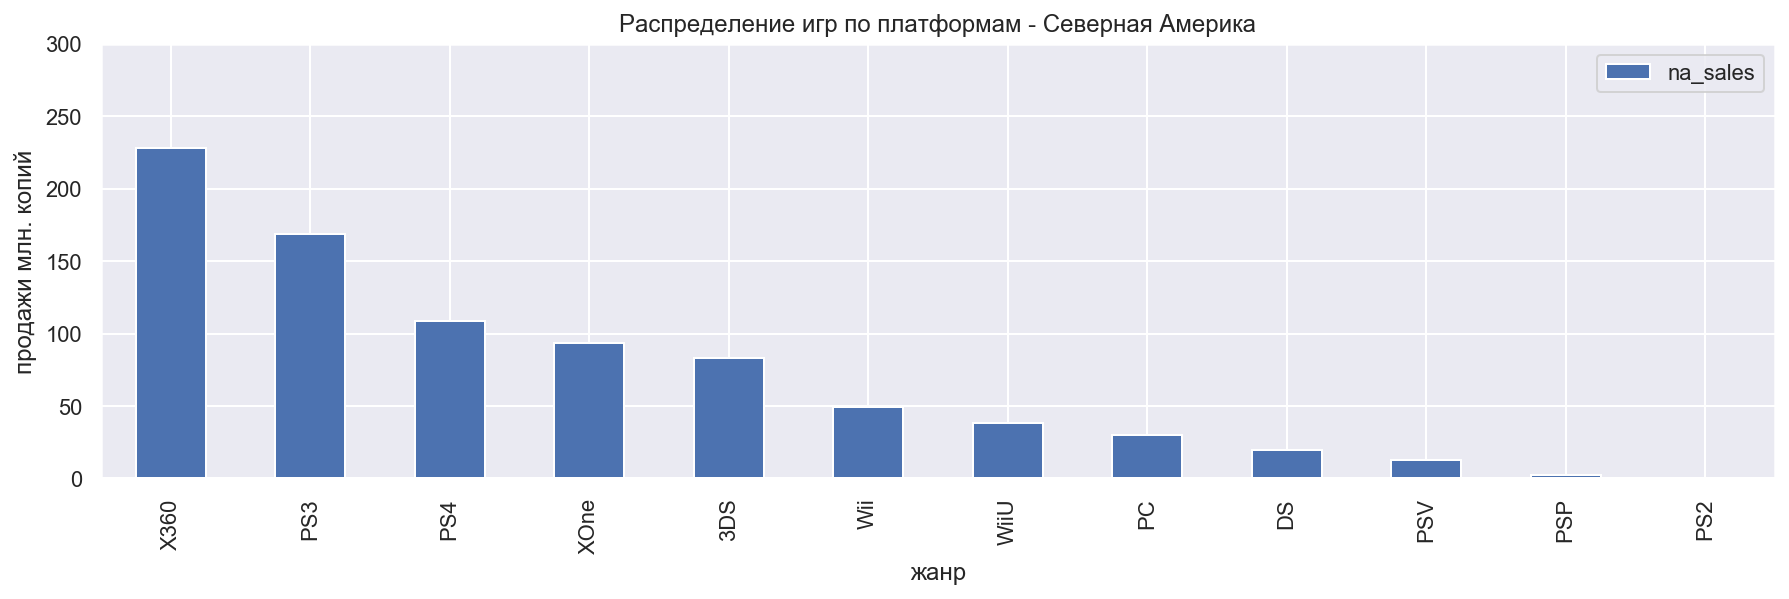

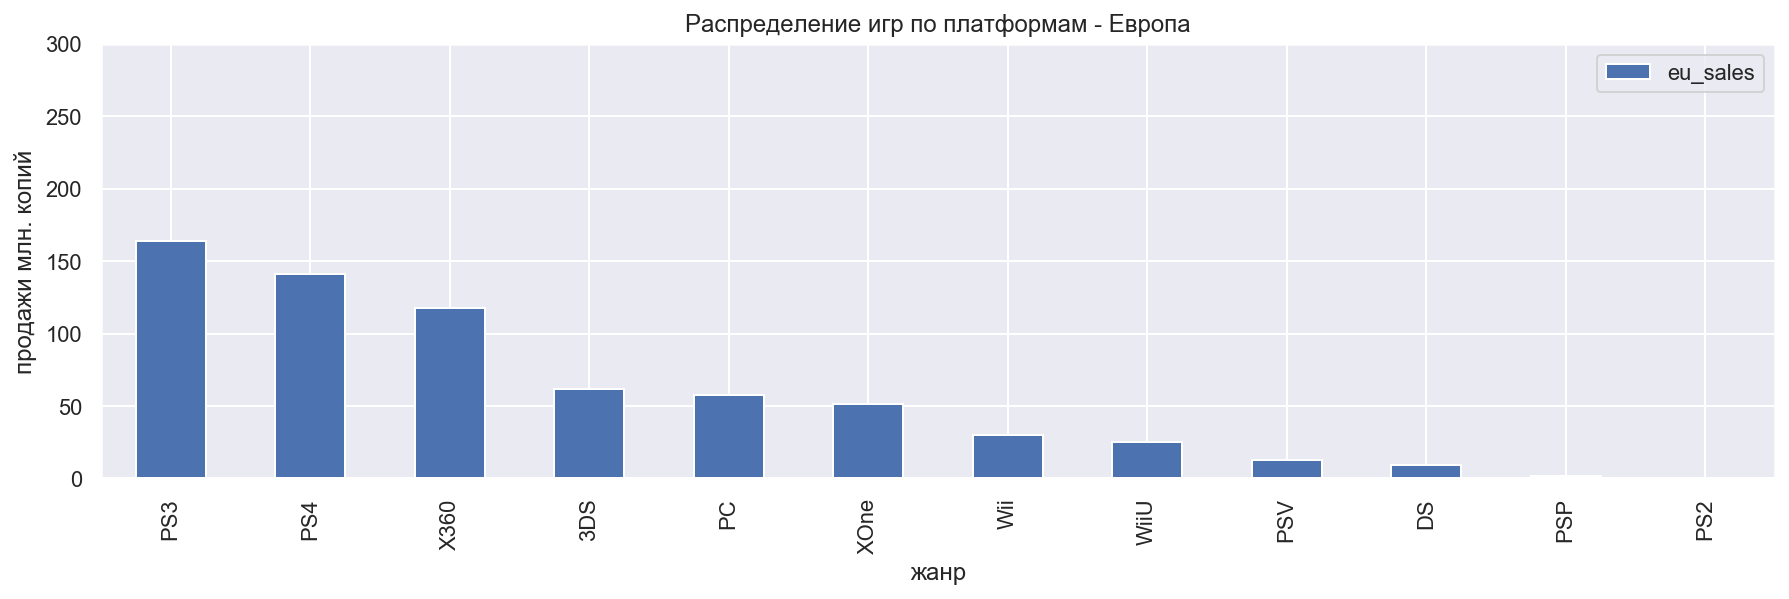

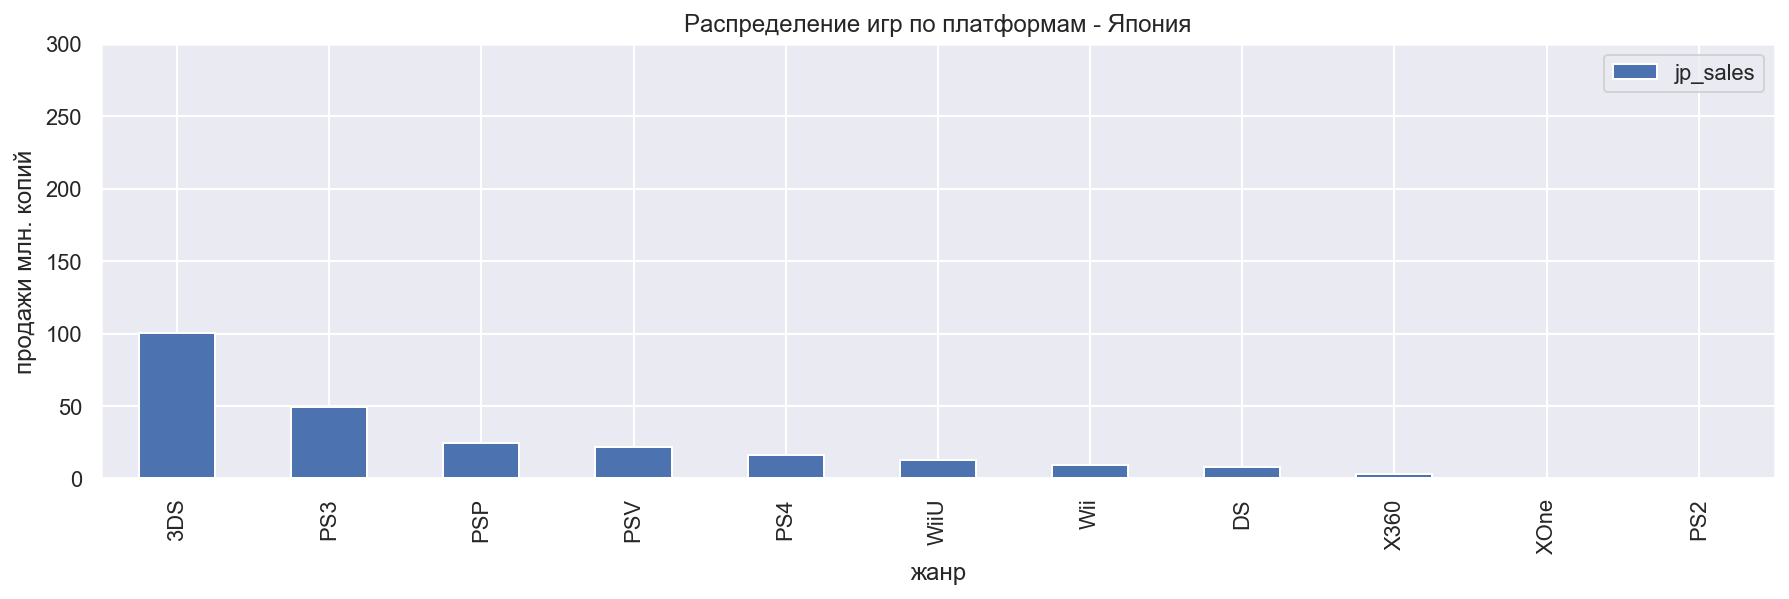

In [105]:
for region in top_platforms_region.keys():
    drawPlot(top_platforms_region[region],title=f'Распределение игр по платформам - {region}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='жанр',ylabel='продажи млн. копий',ylimMax=300)

#### Северная Америка - топ-5 популярных платформ
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

В Америке больше всего любят *Microsoft* (*Xbox 360*), следом идет *Sony* (*PS3,PS4*), заключают 5-ку продукт *Microsoft Xbox One* и *Nintendo 3DS*.

#### Европа - топ-5 популярных платформ
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

В Европе возглавляет лидерство компания *Sony* (*PS3, PS4*), затем идет *Microsoft* с *Xbox 360*, *Nintendo 3DS* и удивительно в 5-ку попал *PC*.

#### Япония - топ-5 популярных платформ
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

В Японии совсем другая ситуация, *Microsoft* менее популярен на рынке Японии. Японцы предпочитают отечественные продукты такие как *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

Рассмотрим жанры.

<a id="top_5_genres_regions"></a>
### Топ-5 популярных жанров по регионам

Сгруппируем данные по жанру и суммируем продажи.

In [106]:
na_users_genre = na_users.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
eu_users_genre = eu_users.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
jp_users_genre = jp_users.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
# Создадим словарь
top_genres_regions = {
    "Северная Америка": na_users_genre,
    "Европа": eu_users_genre,
    "Япония": jp_users_genre
}

Построим графики

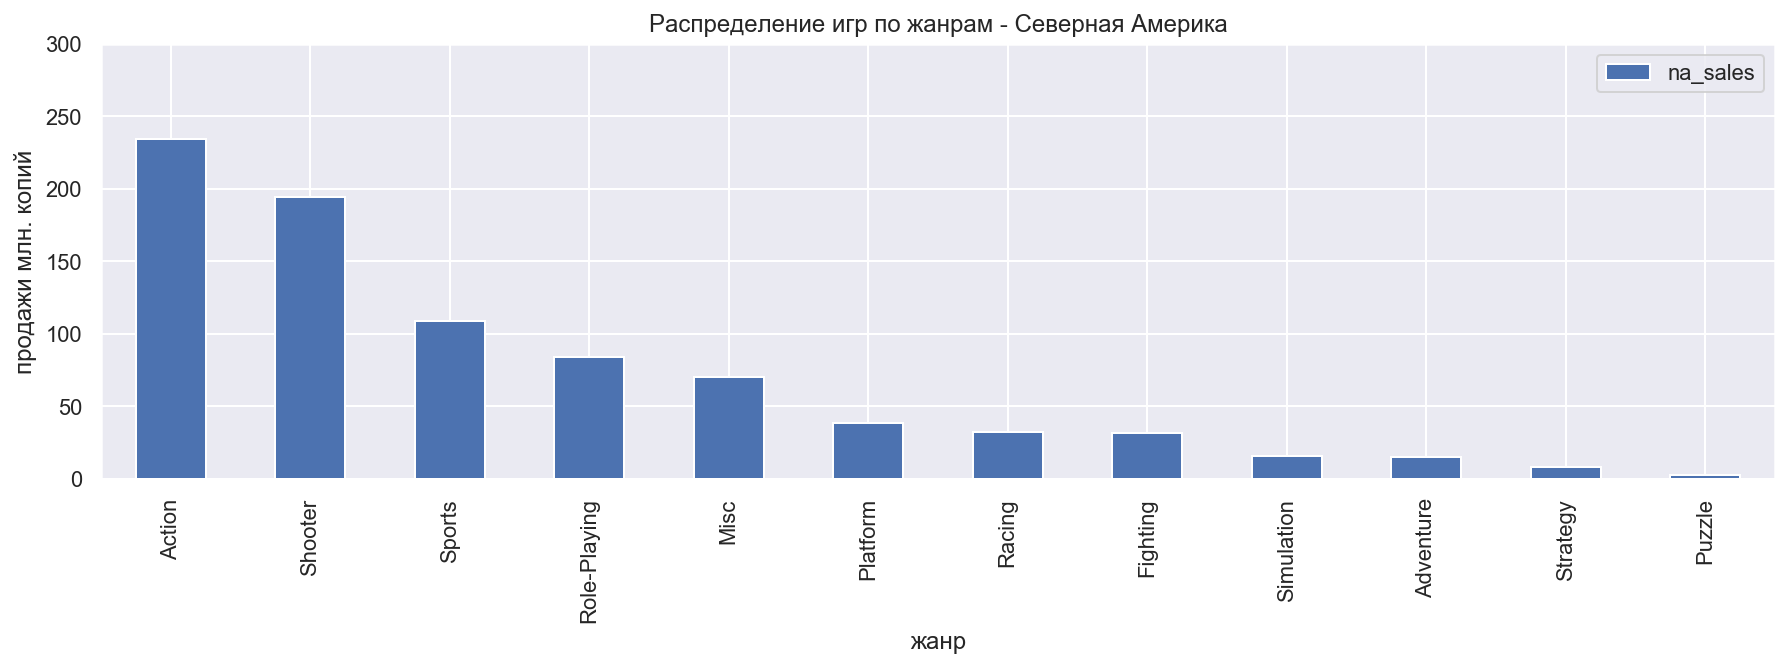

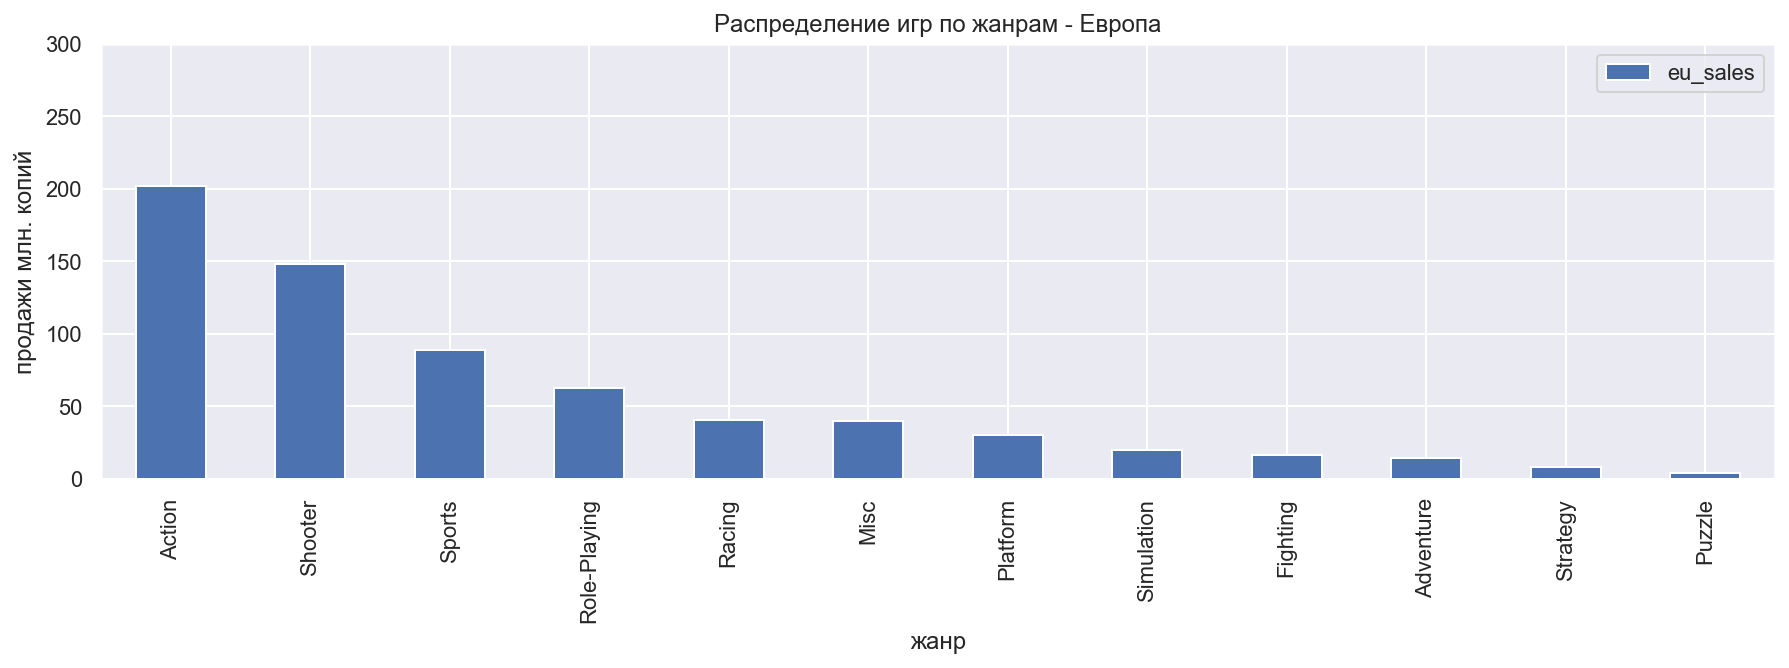

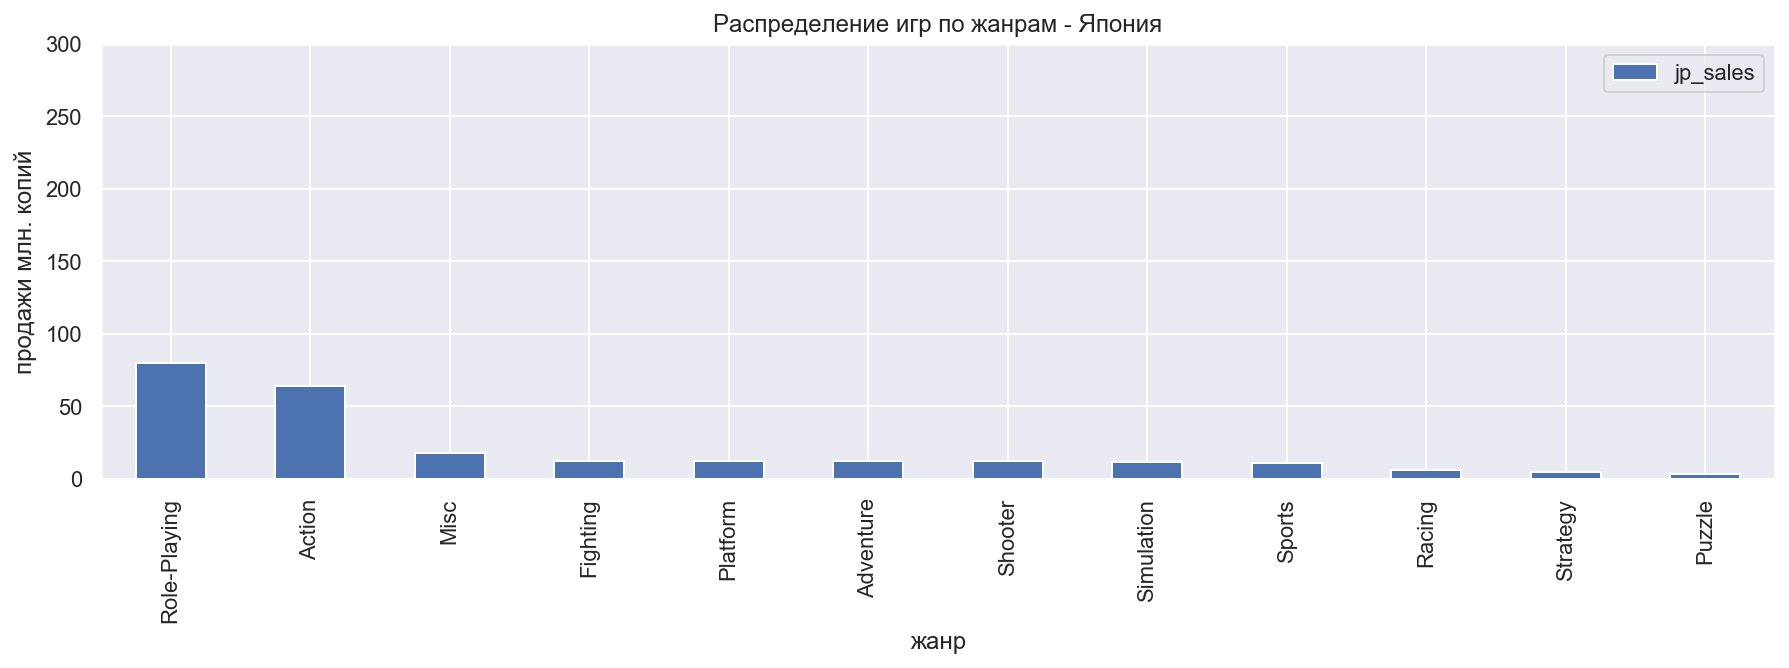

In [107]:
for region in top_genres_regions.keys():
    drawPlot(top_genres_regions[region],title=f'Распределение игр по жанрам - {region}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='жанр',ylabel='продажи млн. копий',ylimMax=300)

#### Северная Америка - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Возглавляет 5-ку жанр - *Action*. Жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. На западном рынке самыми успешными серии игр жанров *Action* и *Shooter* - являются Grand Theft Auto и Call of Duty. *Role-Playing* и *Misc* - закрывают 5-ку популярных жанров.

#### Европа - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

топ-5 похож на рынок Северной Америки. Однако, закрывает 5-ку жанр - *Racing*. Европейцы любят погонять.

#### Япония - топ-5 популярных жанров
1. Role-Playing
2. Action
3. Misc
4. Fightning
5. Adventure

Возглавляет 5-ку жанр - *Role-Playing*. Большинство игр имеют жанр *Role-Playing*. В Японии есть поджанр *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises . Япония - родина таких серий файтингов как Street Fighter, Soul Calibur, Dead or alive. Японский рынок игр отличается от других из-за менталитета этого региона. Большинство отечественных игр сфокусированы на жанре RPG. Японцы предпочитают отечественные игры.

<a id="esrb_impact_sales"></a>
### Влияет ли рейтинг ESRB на продажи ? 

Посмотрим влияет ли рейтинг ESRB на продажи в отдельных регионах.

1. RP - **-1** - игра еще не получила финальный рейтинг от ESRB.
2. EC - **0** - игры с таким рейтингом содержат контент, ориентированный на дошкольную аудиторию.
3. E - **1** - игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов".
4. K-A - **1** - тоже самое, что и E
5. E10+ - **2** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для людей в возрасте от 10 лет и старше.
6. T - **3** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для людей в возрасте 13 лет и старше
7. M - **4** - игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.
8. A0 - **5** - игры с таким рейтингом содержат контент, который, по мнению ESRB, подходит только для тех, кому исполнилось 18 лет и старше.

Так как у нас есть пропущенные данные в rating, необходимо их обработать. Посмотрим сколько пропущенных значений в каждом датафрейме.

In [108]:
for df in [na_users,eu_users,jp_users]:
    checkMissingValues('rating',df)

rating проверка на пропущенные значения, кол-во строк с пропущенным значением:  355
rating проверка на пропущенные значения, кол-во строк с пропущенным значением:  457
rating проверка на пропущенные значения, кол-во строк с пропущенным значением:  1118


Большая часть информации теряется, если мы будем брать выборку без пропущенных значений. Следовательно, логичнее было бы заменить пропущенные значения на "RP" (игра еще не получила финальный рейтинг от ESRB).

In [109]:
for df in [na_users,eu_users,jp_users]:
    df['rating'] = df['rating'].fillna('RP')

#### Северная Америка

Построим графики распределения игр по каждой возрастной категории. 

In [110]:
na_users_esrb_rating = na_users.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)

In [111]:
na_users_esrb_rating

,na_sales
rating,
M,320.000
E,174.100
E10+,122.390
T,115.670
RP,101.010
EC,0.420


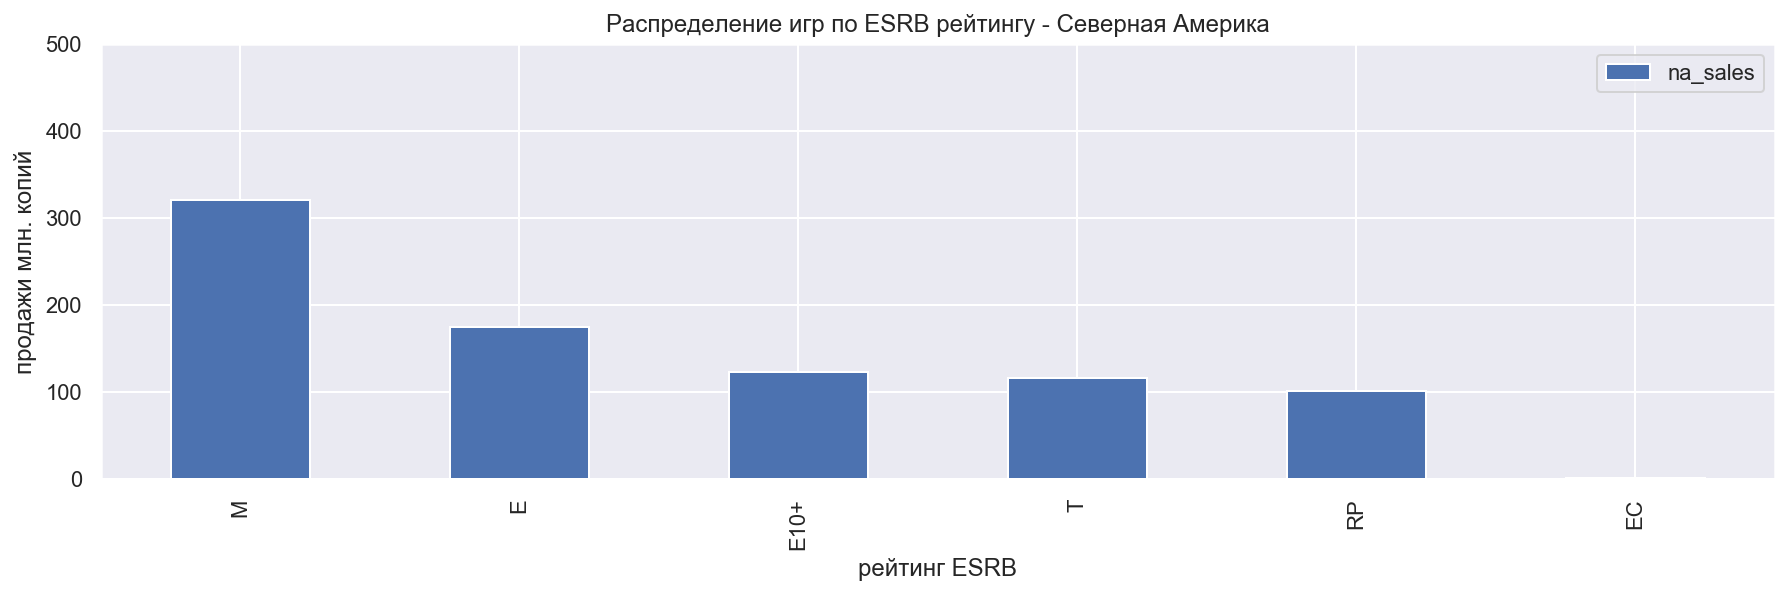

In [112]:
drawPlot(na_users_esrb_rating,title='Распределение игр по ESRB рейтингу - Северная Америка', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='рейтинг ESRB',ylabel='продажи млн. копий',ylimMax=500)

На графике видно, что большинство игр имеют рейтинг M (игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.). Большинство популярных игр имеют рейтинг М. Например, такие популярные серии игр: *Grand Theft Auto*, *Call Of Duty*. На втором месте идет рейтинг E - (игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов").  Заметим, что есть игры которые не получили рейтинг от ESRB.

#### Европа

Те же самые действия сделаем для региона - Европа.

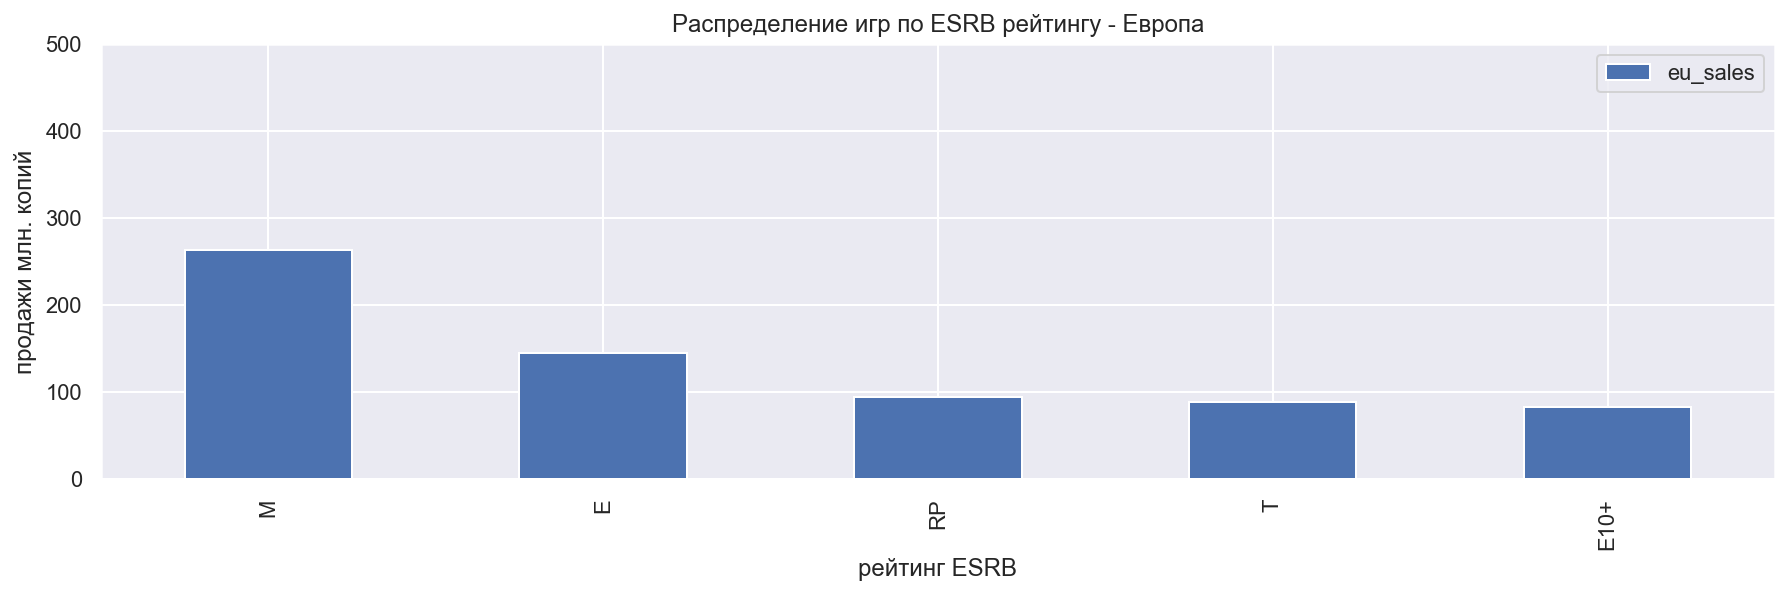

In [113]:
eu_users_esrb_rating = eu_users.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
drawPlot(eu_users_esrb_rating,title='Распределение игр по ESRB рейтингу - Европа', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='рейтинг ESRB',ylabel='продажи млн. копий',ylimMax=500)

График похож на рынок Северной Америки, за исключением, рейтинги Т и E10+ поменялись местами. Также заметим, что есть игры которые не получили рейтинг от ESRB.

#### Япония

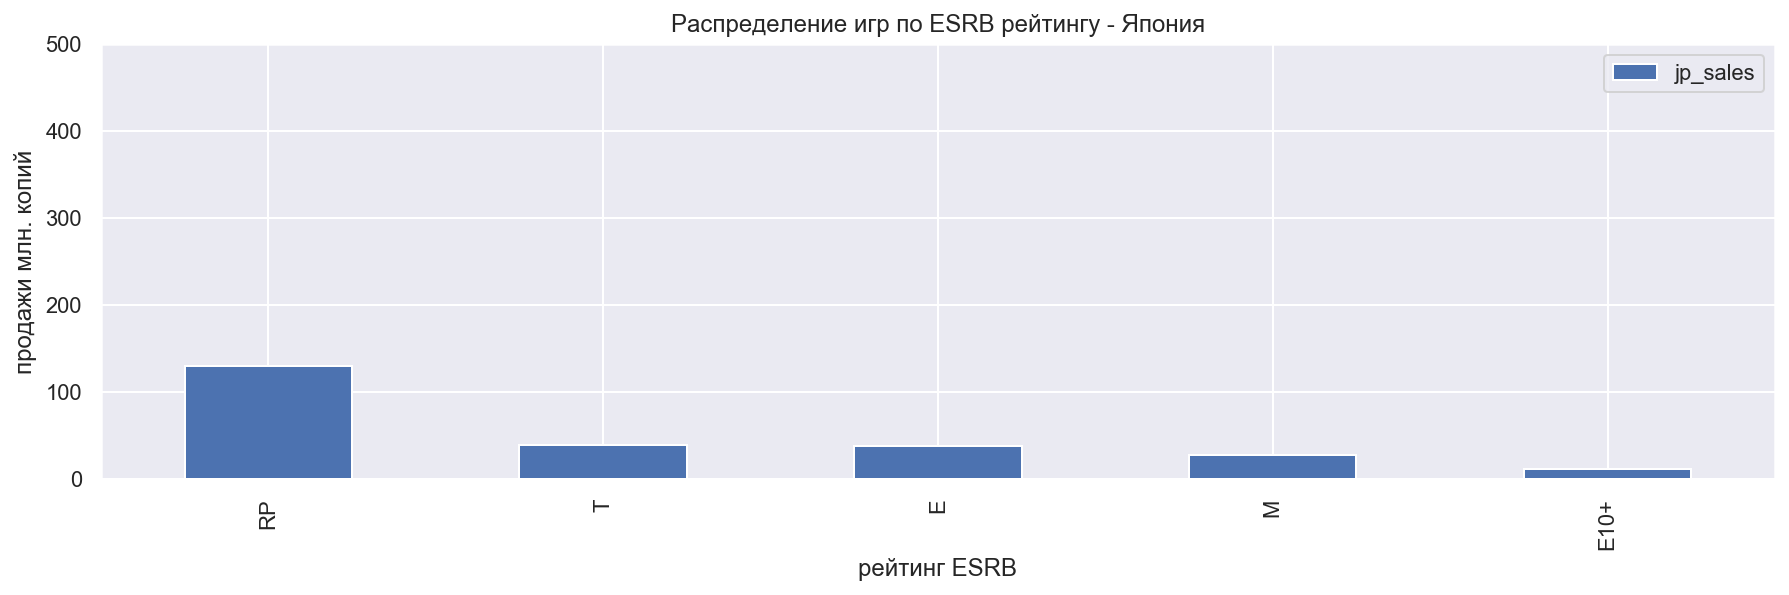

In [114]:
jp_users_esrb_rating = jp_users.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
drawPlot(jp_users_esrb_rating,title='Распределение игр по ESRB рейтингу - Япония', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='рейтинг ESRB',ylabel='продажи млн. копий',ylimMax=500)

Большинство игр не получили рейтинги от ESRB.В играх ,у которых есть категории, категории примерно равны при распределении продаж. Скорее всего, это из-за того,что у нас мало данных получилось по Японии. В Японии популярностью преобладают игры с рейтингами T и E. 

Построим общий график.

In [115]:
na_users_esrb_rating = na_users_esrb_rating.reset_index()
eu_users_esrb_rating = eu_users_esrb_rating.reset_index()
jp_users_esrb_rating = jp_users_esrb_rating.reset_index()
# Обьеденим таблицы
esrb_rating = na_users_esrb_rating.append(eu_users_esrb_rating,ignore_index=True,sort=False)
esrb_rating = esrb_rating.append(jp_users_esrb_rating,ignore_index=True,sort=False)

In [116]:
esrb_rating = esrb_rating.reset_index(drop=True)
esrb_rating_pivot = esrb_rating.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
esrb_rating_pivot = esrb_rating_pivot.reset_index().sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False)

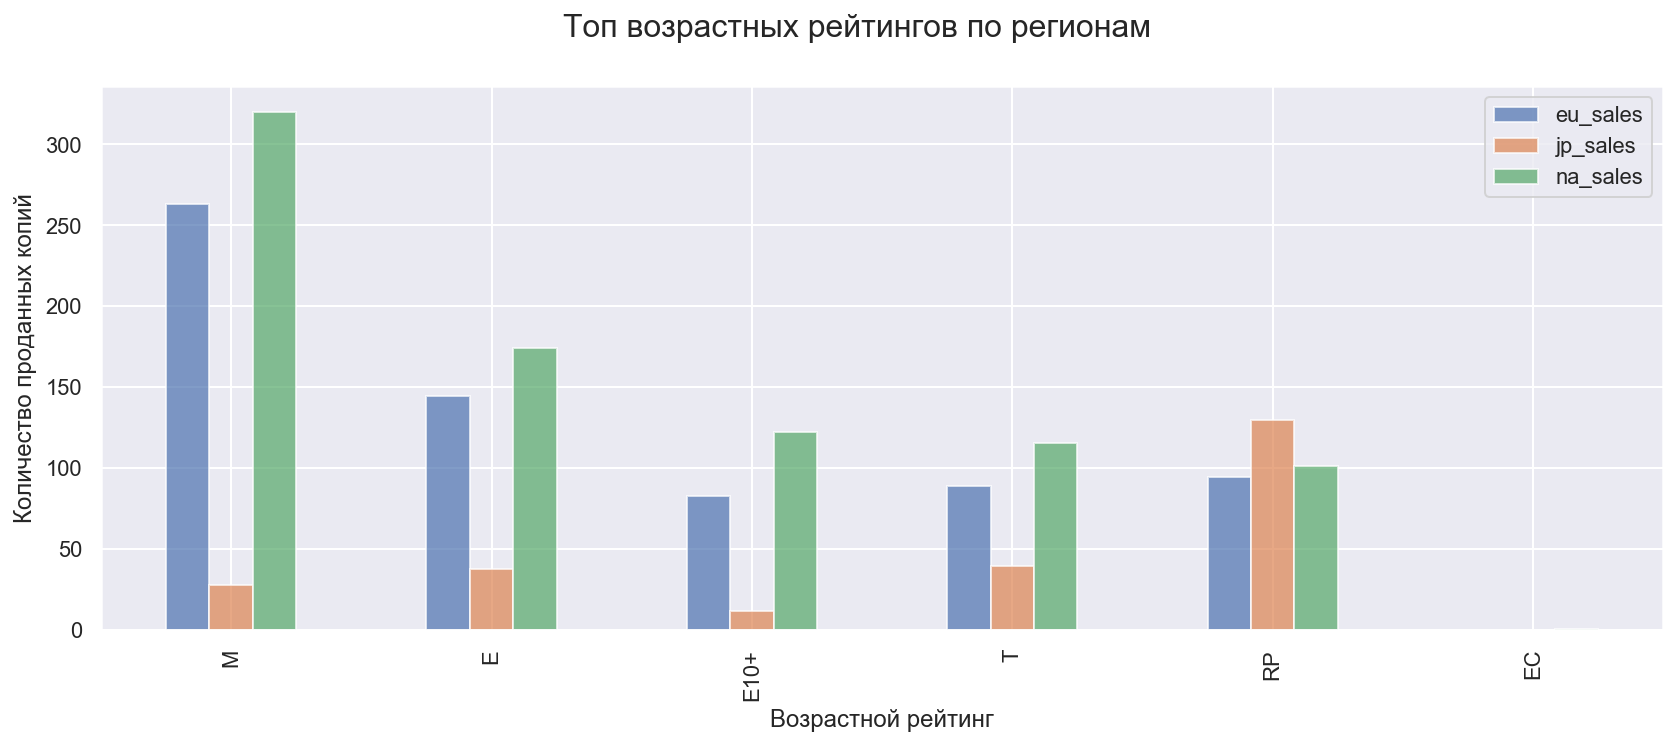

In [117]:
esrb_rating_pivot.plot(x='rating', kind='bar',alpha=.7);
plt.suptitle('Топ возрастных рейтингов по регионам')
plt.ylabel('Количество проданных копий')
plt.xlabel('Возрастной рейтинг')
plt.show()

Основываясь на графиках, можно сделать вывод, что рейтинг ESRB влияет на продажи. Большинство AAA проектов имеют рейтинг *M*.  Самая популярная игра - *Grand Theft Auto 5* имеет возрастной рейтинг *М*(там больше интересного контента чем в играх с возрастным рейтингом E.). Самый популярный возрастной рейтинг - М (игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.). 2-ой по популярности рейтинг - E (игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов"). Можно сделать вывод, что для успешности игры - игра должна иметь возрастной рейтинг **М**.

## Вывод

На этапе статистического анализа данных мы составили портрет пользователя каждого региона выделили топ-5 популярных платформ и топ-5 популярных жанров.
#### Северная Америка - топ-5 популярных платформ
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

В Америке больше всего любят *Microsoft* (*Xbox 360*), следом идет *Sony* (*PS3,PS4*), заключают 5-ку продукт *Microsoft Xbox One* и *Nintendo 3DS*.

#### Европа - топ-5 популярных платформ
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

В Европе возглавляет лидерство компания *Sony* (*PS3, PS4*), затем идет *Microsoft* с *Xbox 360*, *Nintendo 3DS* и удивительно в 5-ку попал *PC*.

#### Япония - топ-5 популярных платформ
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

В Японии совсем другая ситуация, *Microsoft* менее популярен на рынке Японии. Японцы предпочитают отечественные продукты такие как *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

#### Северная Америка - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Возглавляет 5-ку жанр - *Action*. Жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. На западном рынке самыми успешными серии игр жанров *Action* и *Shooter* - являются Grand Theft Auto и Call of Duty. *Role-Playing* и *Misc* - закрывают 5-ку популярных жанров.


#### Европа - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

топ-5 похож на рынок Северной Америки. Однако, закрывает 5-ку жанр - *Racing*. Европейцы любят погонять.

#### Япония - топ-5 популярных жанров
1. Role-Playing
2. Action
3. Misc
4. Fightning
5. Platform

Возглавляет 5-ку жанр - *Role-Playing*. Большинство игр имеют жанр *Role-Playing*. В Японии есть поджанр *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises . Япония - родина таких серий файтингов как Street Fighter, Soul Calibur, Dead or alive.  Японский рынок игр отличается от других из-за менталитета этого региона. Большинство отечественных игр сфокусированы на жанре RPG. Японцы предпочитают отечественные игры.

Мы выяснили, что рейтинг ESRB влияет на продажи в отдельных регионах. Самый популярный возрастной рейтинг - *М* (игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.). Самая популярная игра - *Grand Theft Auto 5* имеет возрастной рейтинг *М*. 2-ой по популярности рейтинг - *E* (игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов"). Можно сделать вывод, для успешности игры - игра должна иметь возрастной рейтинг **М**.

<br>

---

<a id="hypotheses"></a>
# Этап 5 - Проверка гипотез

На этом этапе, нам нужно проверить несколько гипотез:
1. Cредние пользовательские рейтинги платформ Xbox One и PC равны
2. Средние пользовательские рейтинги жанров  *Action* и *Sports* разные

<a id="averageUserScore_XOne_PC"></a>
## Средние пользовательские рейтинги платформ Xbox One и PC равны

Для проверки гипотезы, возьмем генеральную совокупность из пользователей платформы *Xbox One*. Также возьмем генеральную совокупность из пользователей платформы *PC*.

In [119]:
xbox_one_users = xboxOne_sales_2011.reset_index(drop=True)
pc_users = games_stats_2011.query('platform == "PC"').reset_index(drop=True)

Начнём с формулировки нулевой гипотезы H₀ **«среднии пользовательские рейтинги платформ Xbox One и PC равны»**. Исходя из H₀ формулируем альтернативную гипотезу H₁ **«среднии рейтинги пользователей платформ Xbox One и PC различаются»**.

Перед тем как проверить наши гипотезы, необходимо удостовериться в гомогенности дисперсий.Для проверки соблюдения допущения о гомогенности дисперсий воспользуемся тестом Левена. Сформулируем нулевую гипотезу H₀ в тесте Левена **«обе выборки имеют одинаковую дисперсию»**.  Исходя из H₀ формулируем альтернативную гипотезу H₁ **«дисперсия в выборках различается»**.

Используем метод `levene()` из библиотеки *scipy* для проверки гомогенности дисперсий.

In [120]:
# Задаем критический уровень статистической значимости
alpha = 0.05 # общепринятое пороговое значение
# Фильтруем значения, так как есть пропущенные значения. Также уберем те строки, где рейтинг не был определен
xbox_users_score_non_nan = non_nan_column(xbox_one_users,'user_score').query('user_score > 0')
pc_users_score_non_nan = non_nan_column(pc_users,'user_score').query('user_score > 0')
xbox_one_users_score = xbox_users_score_non_nan['user_score']
pc_users_score = pc_users_score_non_nan['user_score']
results = st.levene(xbox_one_users_score,pc_users_score,center='mean')
print('p значение:', results.pvalue)

if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p значение: 0.0003135793614668444
Отвергаем нулевую гипотезу


P значение меньше порогового (alpha). Следовательно, дисперсия в выборках различается.

Проведём статистический тест (t-тест).Воспользуемся методом `scipy.stats.ttest_ind` из библиотеки *scipy*. Сравним две генеральные совокупности (пользователи платформы *Xbox One* и пользователи платформы *PC*). Заметим, что дисперсия двух выборок различается, передадим в параметр equal_var значение False.

In [121]:
# Задаем критический уровень статистической значимости
alpha = 0.05 # общепринятое пороговое значение
results = st.ttest_ind(xbox_one_users_score,pc_users_score,equal_var=False)
print('p значение:', results.pvalue)

if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p значение: 0.8805124325191567
Не получилось отвергнуть нулевую гипотезу


Уровень статистической значимости равен 88%. Эмпирически полученные данные не противоречат нулевой гипотезе. Средние пользовательские рейтинги платформ Xbox One и PC равны. 

Проверим другую гипотезу.

<a id="averageUserScore_Action_Sports"></a>
## Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы, возьмем генеральную совокупность жанра *Action*. Также возьмем генеральную совокупность - жанр *Sports*.

In [122]:
action_genre = games_stats_2011.query('genre == "Action"').reset_index(drop=True)
sports_genre = games_stats_2011.query('genre == "Sports"').reset_index(drop=True)

Также как и в проверке первой гипотезы, необходимо сначала проверить на гомогенность дисперсий из полученных выборок. Воспользуемся тестом Левена. Сформулируем нулевую гипотезу H₀ в тесте Левена **«обе выборки имеют одинаковую дисперсию»**.  Исходя из H₀ формулируем альтернативную гипотезу H₁ **«дисперсия в выборках различается»**.

Используем метод `levene()` из библиотеки *scipy* для проверки гомогенности дисперсий.

In [123]:
# Задаем критический уровень статистической значимости
alpha = 0.05 # общепринятое пороговое значение
# Фильтруем значения, так как есть пропущенные значения. Также уберем те строки, где рейтинг не был определен
action_users_score_non_nan = non_nan_column(action_genre,'user_score').query('user_score > 0')
sports_users_score_non_nan = non_nan_column(sports_genre,'user_score').query('user_score > 0')
action_users_score = action_users_score_non_nan['user_score']
sports_users_score = sports_users_score_non_nan['user_score']

results = st.levene(action_users_score,sports_users_score,center='mean')
print('p значение:', results.pvalue)

if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p значение: 3.9772510109800373e-25
Отвергаем нулевую гипотезу


P значение меньше порогового (alpha). Следовательно, дисперсия в выборках различается.

Сформулируем нулевую гипотезу H₀  **«среднии пользовательские рейтинги жанров Action и Sports равны»**. Исходя из H₀ формулируем альтернативную гипотезу H₁ **«среднии рейтинги пользователей жанров Action и Sports различаются»**.

Проведём статистический тест (t-тест).Воспользуемся методом `scipy.stats.ttest_ind` из библиотеки *scipy*. Заметим, что дисперсия двух выборок различается, передадим в параметр *equal_var* значение *False*.

In [124]:
# Задаем критический уровень статистической значимости
alpha = 0.05 # общепринятое пороговое значение
results = st.ttest_ind(action_users_score,sports_users_score,equal_var=False)
print('p значение:', results.pvalue)

if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p значение: 2.50925055138252e-25
Отвергаем нулевую гипотезу


Исходя из p-значения(**0%** *вероятность получить результат чтобы среднии рейтинги жанров Action и Sports равны*), мы можем сделать вывод, что среднии пользовательские рейтинги жанров *Action* и *Sports* различаются.

## Вывод

Мы провели проверку гипотез с помощью статистического тестирования. Гипотезы которые мы проверили:
1. Cредние пользовательские рейтинги платформ Xbox One и PC равны - проверку прошла. Есть вероятность 88%,эмпирически полученные данные не противоречат нулевой гипотезе. Cредние пользовательские рейтинги платформ Xbox One и PC равны. 
2. Средние пользовательские рейтинги жанров  *Action* и *Sports* разные - проверку прошла. Среднии пользовательские рейтинги жанров Action и Sports различаются.

<br>

---

<a id="results"></a>
# Этап 6 - Результаты исследования

В ходе сборного проекта мы выявили закономерности определяющие успешность игры. Интересная информация, которую мы нашли:
1. Последние 4 года, количество игр колеблиться в пределах 500-600 в год. Трудно определить, сколько в среднем выпускается игр в месяц, однако, можно смело утверждать, что со временем количество игр увеличивалось. За 28 лет количество игр увеличилось в **160** раз.  После 2008 года, произошел спад в разработке игр. Спад после 2008 года образовался из-за кризиса 2008 года.  Нашел очень хорошую статью про спад после 2008 года. https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda . После спада количество игр колеблиться в пределах 500-600 в год.
2. Определили срок актуальности платформы - **6 лет**. За этот период мы сможем увидеть падение текущих для того периода консолей и рост продаж новых консолей.
5. Определили лидирующие платформы. Топ-5 лидирующих платформ: *PS3*,*Xbox 360*,*PS4*,*3DS*,*Wii*. 3 корпорации возглавляют рынок игровой индустрии:
    - Sony
    - Microsoft
    - Nintendo
6. Построили график распределения продаж и выявили:
    - Консоли прошлого поколения становятся неактульными.*PS3* и *Xbox 360*, *Wii* - рост продаж падает с каждым годом.
    - Консоли нового поколения показывают актуальность: *PS4*, *Xbox One*,*WiiU*. Их можно считать перспективными платформами. Прошло не так уж и много времени для срока актуальности. Возможно эти консоли покажут прибыль в следующем году, может игры новые выйдут тем самым продажа для этих консолей увеличиться.
7. Посмотрели распределение по продажам в разбивке по платформам. Лидеры по глобальным продажам: *Xbox 360*,*PS3*. Большинство значений лежит в диапазоне от 25млн до 115 млн копий. В среднем Xbox 360 - 60млн. копий, PS3 - 80млн. копий. Консоли нового поколения не отстают в продажах. *3DS* - глобальные продажи похожи схожи с продажами на *Xbox One*. Менее популярные платформы: *PSP*,*PSV*,*WiiU* - "портативные консоли". PS4 - большинство продаж лежит в диапазоне от 60 до 105 млн. копий. В среднем около 84 млн долларов. PS4 является самой прибыльной платформой по сравнению с другими платформами. WiiU - суммарное число продаж не доходит до 25млн. копий. Следовательно, можем считать её менее прибыльной. Может быть какие-нибудь игры от известных студий улучшат ситуацию. Xbox One - Большинство продаж лежит в диапазоне от 23млн до 57 млн копий. В среднем около 40 млн копий - каждый год продается на этой платформе. **Следовательно, в следующем году можно сделать упор на новые приставки *Xbox One* и *PS4*.**  WiiU - менее прибыльная платформа, так как целом портативные платформы(консоли) менее популярны. Что насчёт остальных платформ, PS4 оказался самой популярной платформой из-за большого количества эксклюзивных игр. У Sony есть собственный набор эксклюзивных игр, которые не доступны на Xbox One: Uncharted 4, Gran Turismo Sport, God of War, Death Stranding, Persona 5, Street Fighter V, The Last Guardian и многие другие. Тем временем, Xbox One может похвастаться доступностью к библиотеке игр с прошлого поколения, чего нет ни в одной консоли в мире.
8. Рассмотрели корреляцию оценок пользователей и критиков на продажи игры. Мы выяснили, что в целом, **оценки пользователей не влияют на суммарные продажи игр для перспективных консолей.Тем временем, оценки критиков влияют, но не всегда.**
9. Также рассмотрели распределение игр по жанрам. Возглавляют распределение жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. Например, *Action* - простой гемплей, несколько кнопок - (передвижение, стрельба, и дополнительные действия). В жанре *Action* - сюжет не такой комплексный, как в жанре *Role-Playing*. В жанре *Shooter* - тоже простой геймплей и управление.  Самыми успешными серии игр жанров *Action* и *Shooter* - являются AAA проекты: *Grand Theft Auto и Call of Duty*. https://zen.yandex.ru/media/gabestore/aa-aaa-aaaa-chto-oboznachaiut-aabbreviatury-v-geimdeve-5ca5dafa53239a00b3a77571 - крутая статья про AAA проекты, где рассказывается почему так дорого стоят эти проекты и почему они получают огромную выручку. *Sports* - много болельщиков спорта, которые хотят поиграть за свои любимые команды(например Fifa) и этот жанр прост в усвоении. Менее прибыльные жанры: *Adventure*,*Strategy*,*Puzzle*.*Strategy* - из-за своей специфике жанра, порог вхождения выше чем у остальных жанрах. *Puzzle* - в этом жанре практически нет крупных проектов. *Adventure* - скорее всего подразумевается как квесты. В этом жанре очень мало или вообще нету крупных релизов.
10. Мы построили портрет пользователя в каждом регионе и выделили топ-5 популярных платформ и топ-5 популярных жанров

#### Северная Америка - топ-5 популярных платформ
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

В Америке больше всего любят *Microsoft* (*Xbox 360*), следом идет *Sony* (*PS3,PS4*), заключают 5-ку продукт *Microsoft Xbox One* и *Nintendo 3DS*.

#### Европа - топ-5 популярных платформ
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

В Европе возглавляет лидерство компания *Sony* (*PS3, PS4*), затем идет *Microsoft* с *Xbox 360*, *Nintendo 3DS* и удивительно в 5-ку попал *PC*.

#### Япония - топ-5 популярных платформ
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

В Японии совсем другая ситуация, *Microsoft* менее популярен на рынке Японии. Японцы предпочитают отечественные продукты такие как *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

#### Северная Америка - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Возглавляет 5-ку жанр - *Action*. Жанры: *Action*, *Shooter* и *Sports* - легкие жанры для усвоения. На западном рынке самая успешная серия игр жанров *Action* и *Shooter* - является Grand Theft Auto и Call of Duty. *Role-Playing* и *Misc* - закрывают 5-ку популярных жанров.


#### Европа - топ-5 популярных жанров
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

топ-5 похож на рынок Северной Америки. Однако, закрывает 5-ку жанр - *Racing*. Европейцы любят погонять.

#### Япония - топ-5 популярных жанров
1. Role-Playing
2. Action
3. Misc
4. Fightning
5. Platform

Возглавляет 5-ку жанр - *Role-Playing*. Большинство игр имеют жанр *Role-Playing*. В Японии есть поджанр *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises . Япония - родина таких серий файтингов как Street Fighter, Soul Calibur, Dead or alive.  Японский рынок игр отличается от других из-за менталитета этого региона. Большинство отечественных игр сфокусированы на жанре RPG. Японцы предпочитают отечественные игры.

Мы выяснили, что рейтинг ESRB влияет на продажи. Самый популярный возрастной рейтинг - М (игры с таким рейтингом содержат контент, который, по мнению ESRB, в целом подходит для лиц в возрасте 17 лет и старше.). 2-ой по популярности рейтинг - E (игры с таким рейтингом содержат контент, который, по мнению ESRB, "в целом подходит для всех возрастов"). Можно сделать вывод, что для успешности игры - игра должна иметь возрастной рейтинг **М**.

Мы проверили несколько гипотез и выяснили:
1. Eсть вероятность 54% получить событие, где средние пользовательские рейтинги платформ Xbox One и PC равны 
2. Среднии пользовательские рейтинги жанров Action и Sports различаются.

### Метрики которые определяют успешность игры:
1. Актуальность платформы для которая игра была выпущена. 
2. Лидирующие платформы и большие корпорации возглавляющие рынок игровой индустрии.
3. Игры должны выходить на консолях нового поколения.
4. Оценки критиков частично влияют на продажи.
5. Для успешности игры - игра должна иметь возрастной рейтинг *М*.
6. Жанр игры должен быть простым для усвоения и популярным. 
7. Геомаркетинг, необходимо учитывать регионы, так как вкусы людей из разных регионов различаются.

### Рекомендации по дальнейшим действиям:
Основываясь на метриках, которые определяют успешность игры, можно дать рекомендации по дальнейшим действиям. Интернет-магазину "Стримчик" необходимо найти игру, которая будет соответствовать метрикам выше: 
1. Актуальность платформы - игра должна быть свежей, вышедшей для консолей нового поколения(*PS4*,*Xbox One*).
2. Лидирующие платформы - игра должна быть выпущена для популярных платформ такие как: *PS4*,*Xbox One*.
3. Необходимо учесть оценку критиков при выборе игры. Посмотреть обзоры от ютуберов-геймеров, например. 
4. Большинство популярных игр имеют возрастной рейтинг *M*. Самая популярная игра - *Grand Theft Auto 5* имеет возрастной рейтинг *М*. Следовательно, необходимо учесть этот показатель.
5. Жанр игры должен быть простым для усвоения и популярным. Популярные жанры: *Action*,*Shooter*. Самыми успешными серии игр жанров *Action* и *Shooter* - являются AAA проекты: *Grand Theft Auto и Call of Duty*. 
6. Стоит обратить внимание на геолокацию пользователей. У каждого региона разные вкусы. Например,  Японский рынок игр отличается от других из-за менталитета этого региона. Большинство отечественных игр сфокусированы на жанре RPG. Японцы предпочитают отечественные игры, также они предпочитают отечественные продукты такие как *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.